### IBM HR Analytics Employee Attrition & Performance

### 1.Reading the data and data description (ทำความเข้าใจ Data)

### 2.Defining the problem 

### 3.The distribution of Target

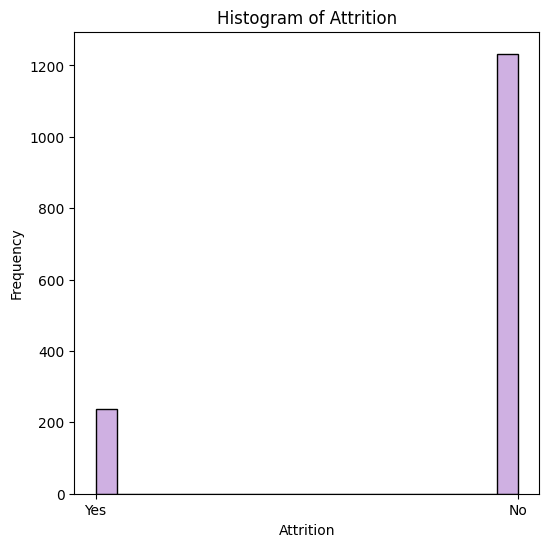

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = './CSV/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Plotting Histogram for the 'death' column
plt.figure(figsize=(6, 6))
plt.hist(df['Attrition'], bins=20, color='#CFB0E2', edgecolor='black')
plt.title('Histogram of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Frequency')
plt.show()

### 4.Basic Data Exploration (การสำรวจข้อมูลเบื้องต้น)

##### 4.1 สำรวจประเภทของข้อมูล และจำนวน Missing Value ของแต่ละ Feature

##### 4.2 การสรุปสถิติ  


##### 4.3 Cleaning Data
จัดการ Data ด้วยการตัด column ที่มี missing value มากกว่า 40% และตัด row ที่มี missing value มากกว่า 30% 

เพราะปริมาณข้อมูลที่สูญหายมากเกินไป จึงไม่สามารถใช้วิธีนำมาเติม Missing Value ได้

In [25]:
import os

# เก็บจำนวนคอลัมน์และแถวก่อนการลบ
cols_before = df.columns
rows_before = df.shape[0]

# ลบคอลัมน์ที่มีค่าหายไปมากกว่า 40%
df = df.loc[:, df.isnull().mean() < 0.4]
cols_after = df.columns

# ลบแถวที่มีค่าหายไปมากกว่า 30%
df = df.dropna(thresh=len(df.columns) * 0.7)
rows_after = df.shape[0]

# คำนวณจำนวนคอลัมน์ที่ถูกลบออก
cols_dropped = set(cols_before) - set(cols_after)

# คำนวณจำนวนแถวที่ถูกลบ
rows_dropped = rows_before - rows_after

# แสดงผลลัพธ์
print("cols_before : ",cols_before)
print("cols_After : ",cols_after)
print("คอลัมน์ที่ถูกลบ:")
print(cols_dropped)
print("\nคอลัมน์ที่ยังคงอยู่:")
print(df.columns)
print(f"\nจำนวนแถวที่ถูกลบ: {rows_dropped}")
print("\nข้อมูลตัวอย่างหลังการลบ:")

#ปริ้นตารางมาเช็ค
df.head()

folder_path = 'CSV'
output_file = os.path.join(folder_path, 'cleaning.csv')
df.to_csv(output_file, index=False)

cols_before :  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
cols_After :  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 

##### 4.3.Plot Graph

พลอตกราฟเพื่อดูการกระจายตัวของข้อมูล เพื่อดูความสมมาตรและความเบ้ของข้อมูล โดย
- ตัวแปรเชิงหมวดหมู่: บาร์พล็อต
- ตัวแปรต่อเนื่อง: ฮิสโทแกรมและบ็อกซ์พล็อต

##### แสดงภาพการกระจายตัวของตัวแปร Categorical Predictor ทั้งหมดในข้อมูลโดยใช้กราฟแท่ง

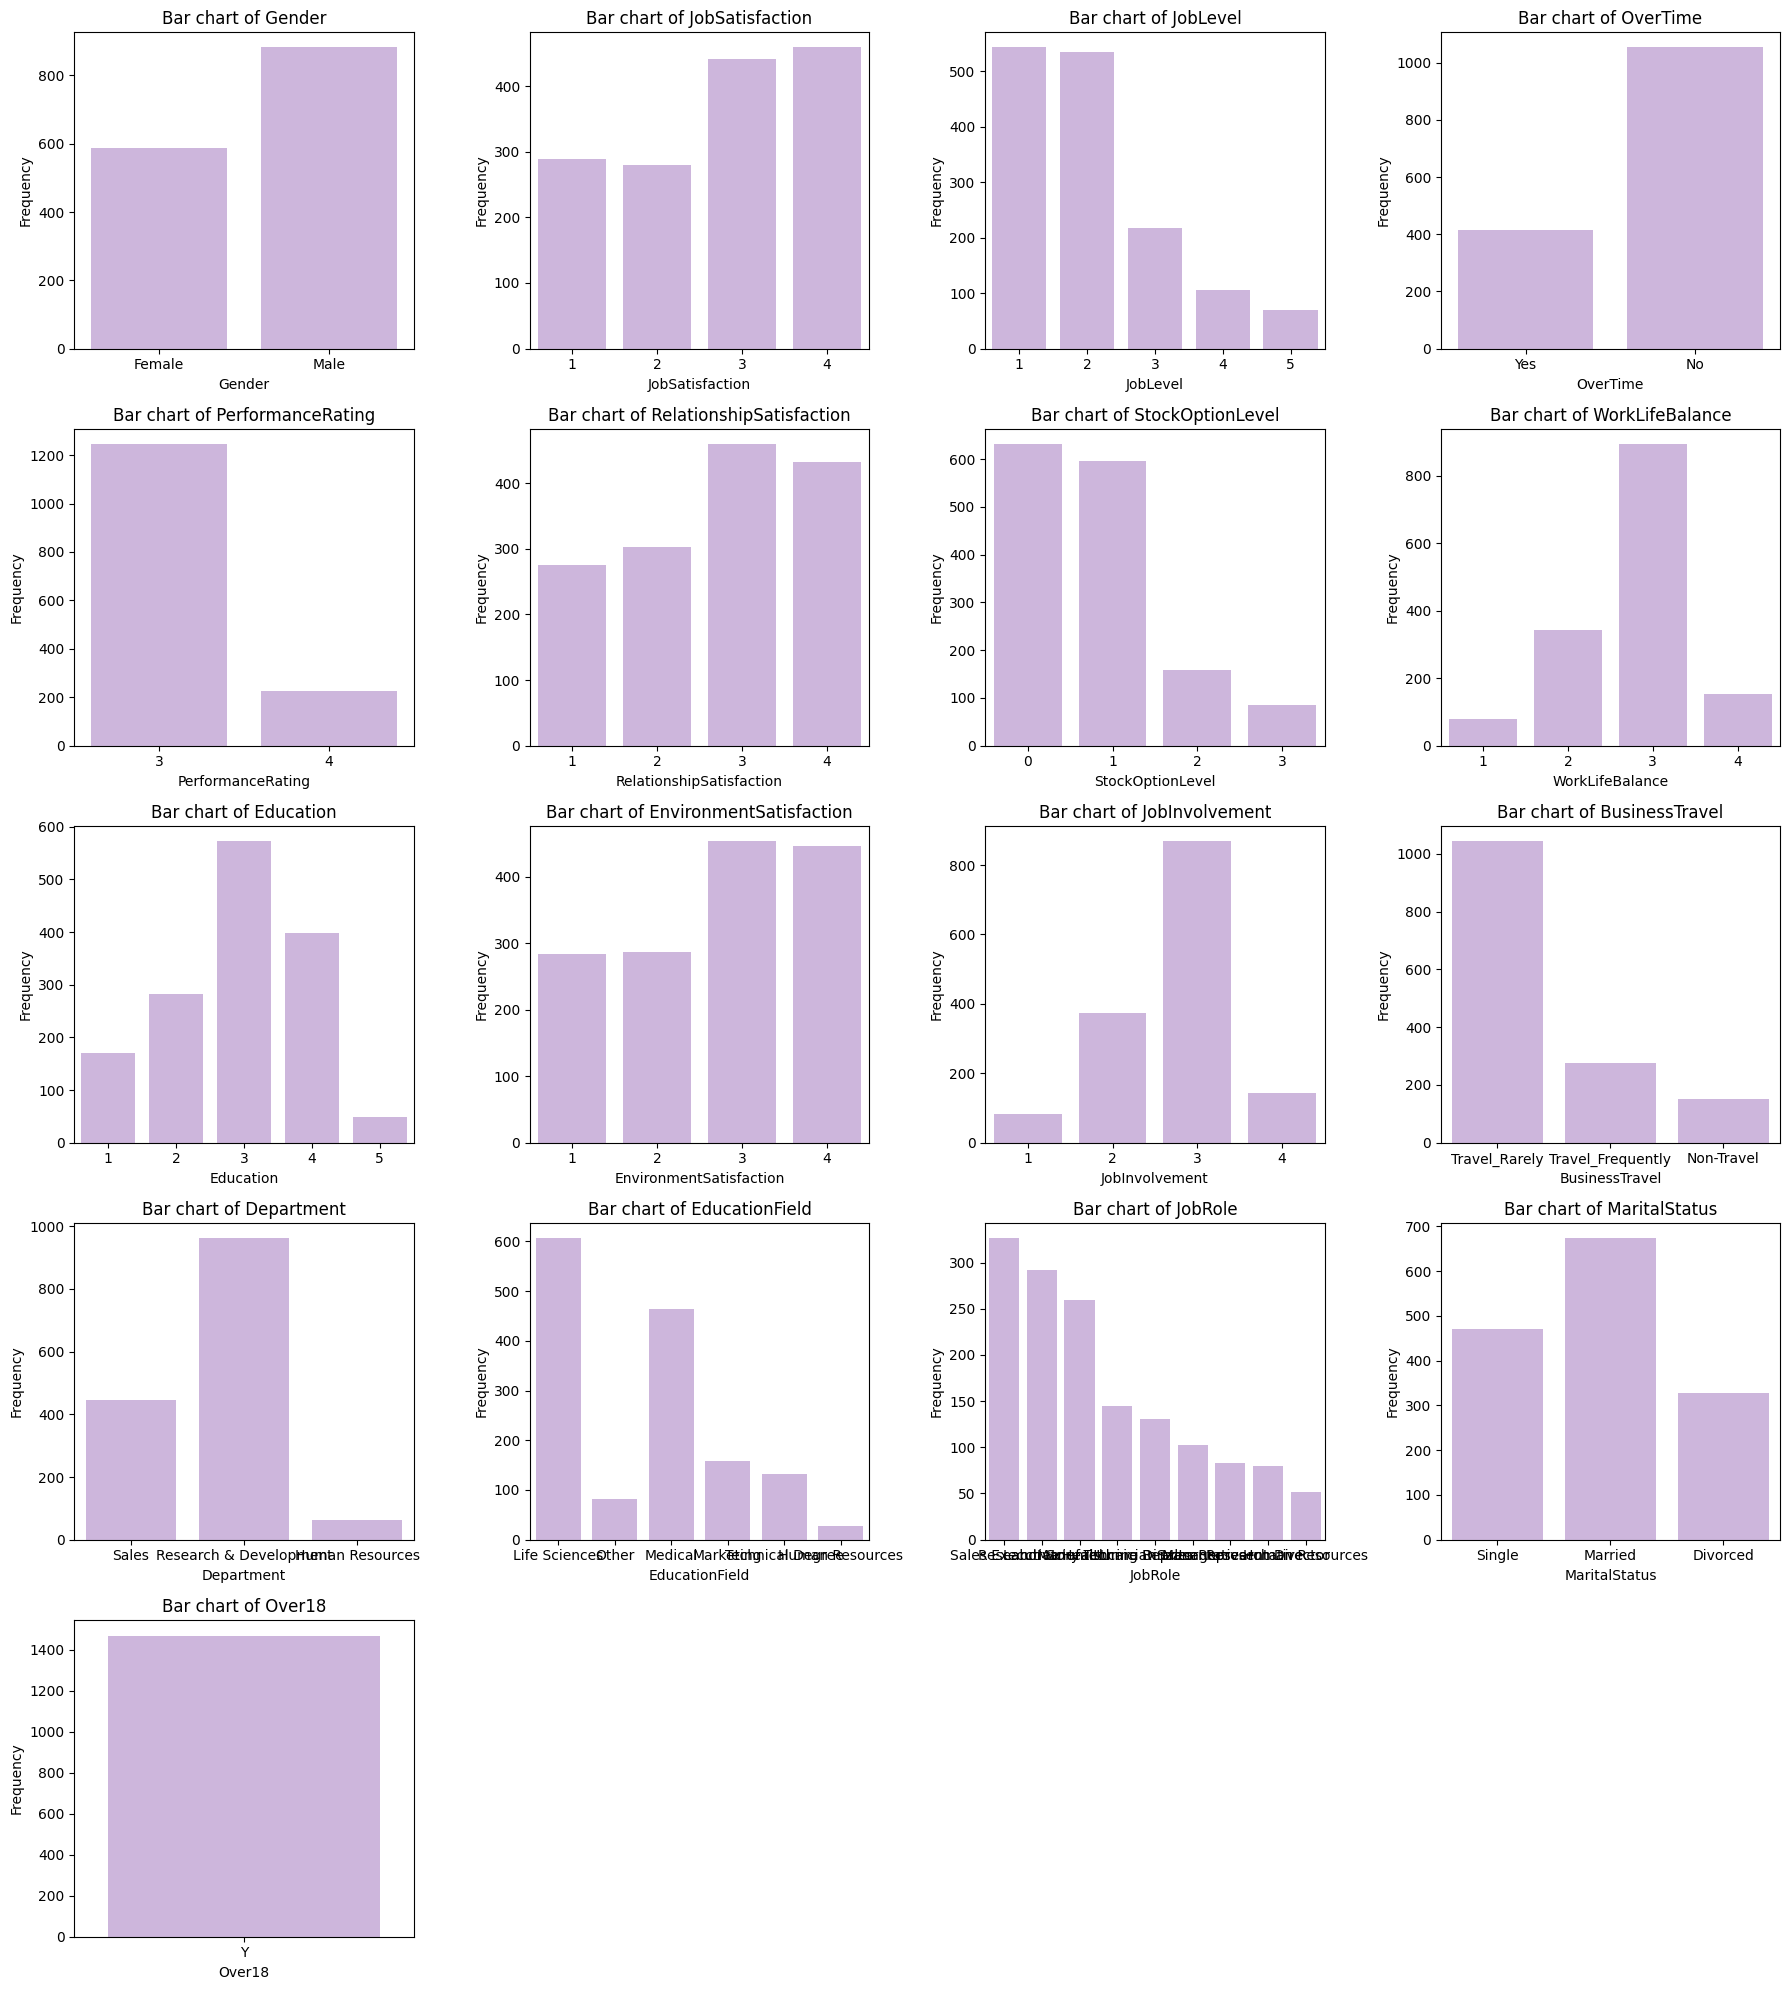

In [18]:
import seaborn as sns

# Load the data from the uploaded file
file_path = './CSV/cleaning.csv'
data = pd.read_csv(file_path)

# List of specific columns to plot
columns_to_plot = ['Gender','JobSatisfaction','JobLevel','OverTime',
                   'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance',
                   'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'BusinessTravel',
                    'Department', 'EducationField','JobRole','MaritalStatus', 'Over18']

# Set the number of rows and columns for subplots
n_cols = 4
n_rows = (len(columns_to_plot) // n_cols) + 1

# Create subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot bar plots for each specified column with blue color
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=data, x=column, ax=axes[i], color='#cFB0E2')
    axes[i].set_title(f'Bar chart of {column}')
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

##### 4.4. แสดงภาพการกระจายตัวของตัวแปร Continuous Predictor ทั้งหมดในข้อมูลโดยใช้ฮิสโทแกรม

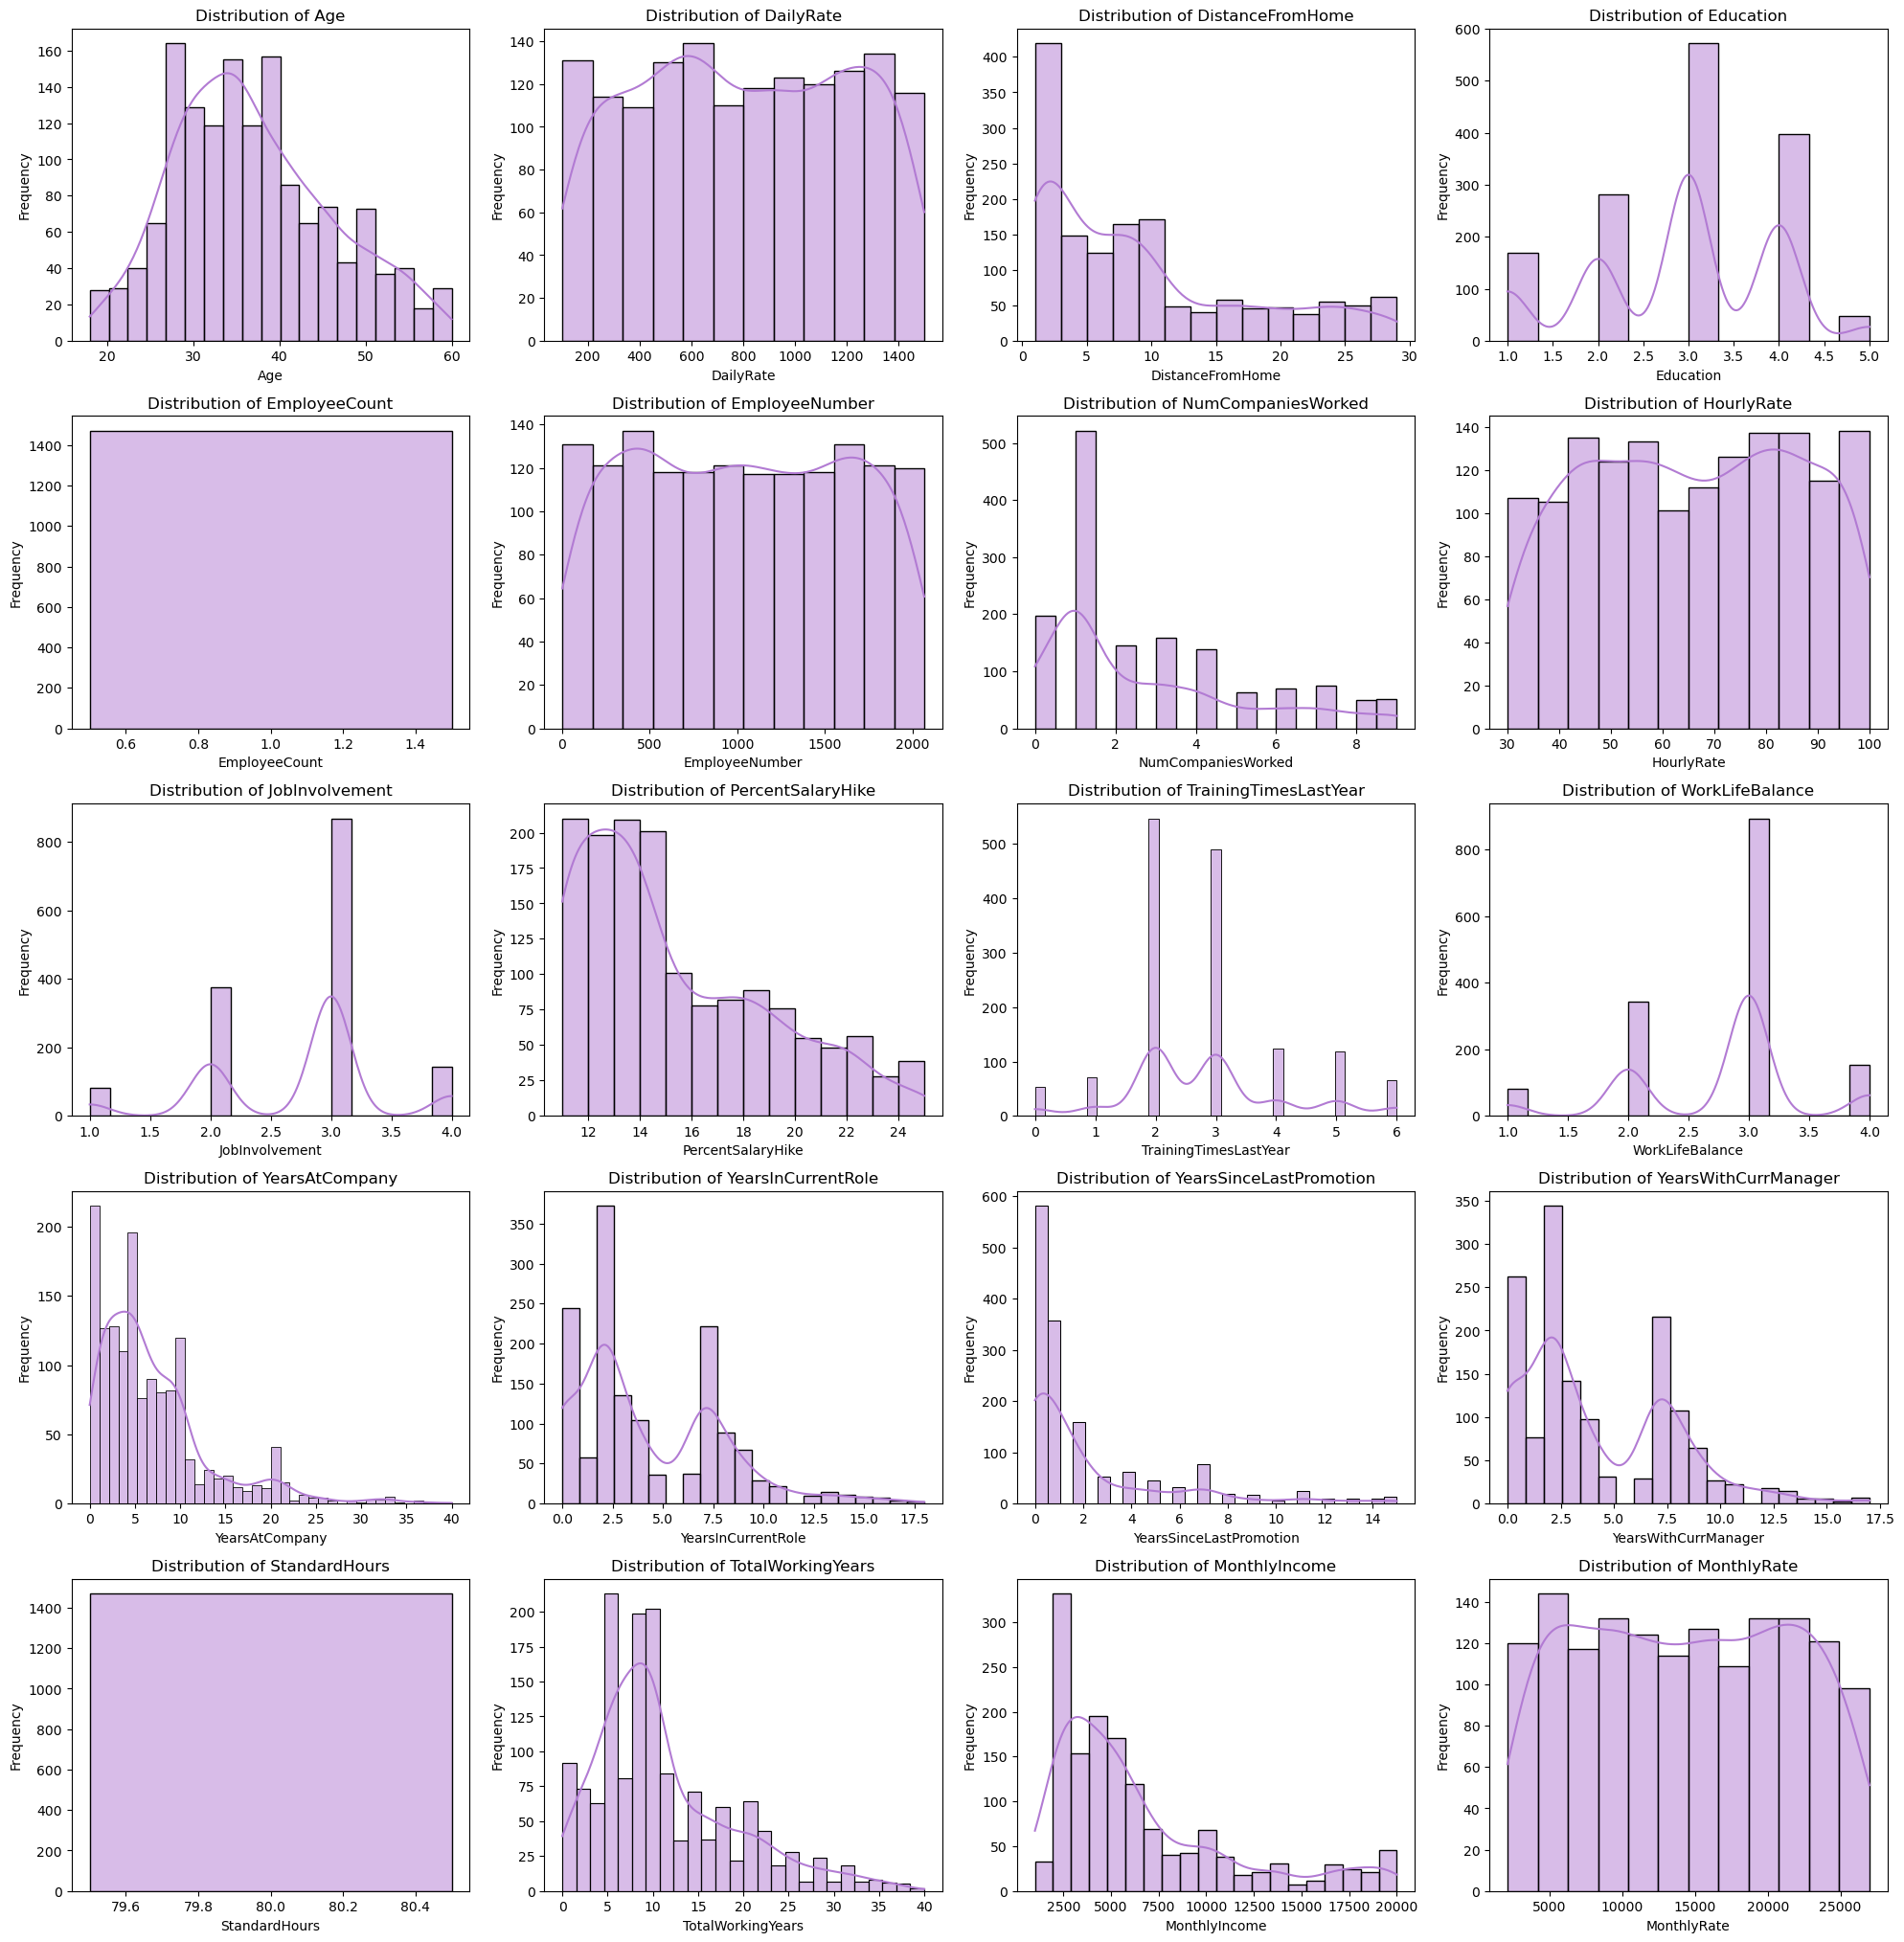

In [58]:
# List of columns for which to plot histograms
columns_to_plot = [
    "Age", "DailyRate","DistanceFromHome", "Education", "EmployeeCount",
    "EmployeeNumber", "NumCompaniesWorked", "HourlyRate", "JobInvolvement",  
    "PercentSalaryHike", "TrainingTimesLastYear", "WorkLifeBalance", 
    "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", 
    "YearsWithCurrManager", "StandardHours", "TotalWorkingYears", "MonthlyIncome", 
    "MonthlyRate"
]

# Set the number of rows and columns for subplots
n_cols = 4
n_rows = (len(columns_to_plot) // n_cols) + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each specified column
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], kde=True, ax=axes[i], color='#B27BD3')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

c:\Users\suwat\jupyter notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\suwat\jupyter notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\suwat\jupyter notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\s

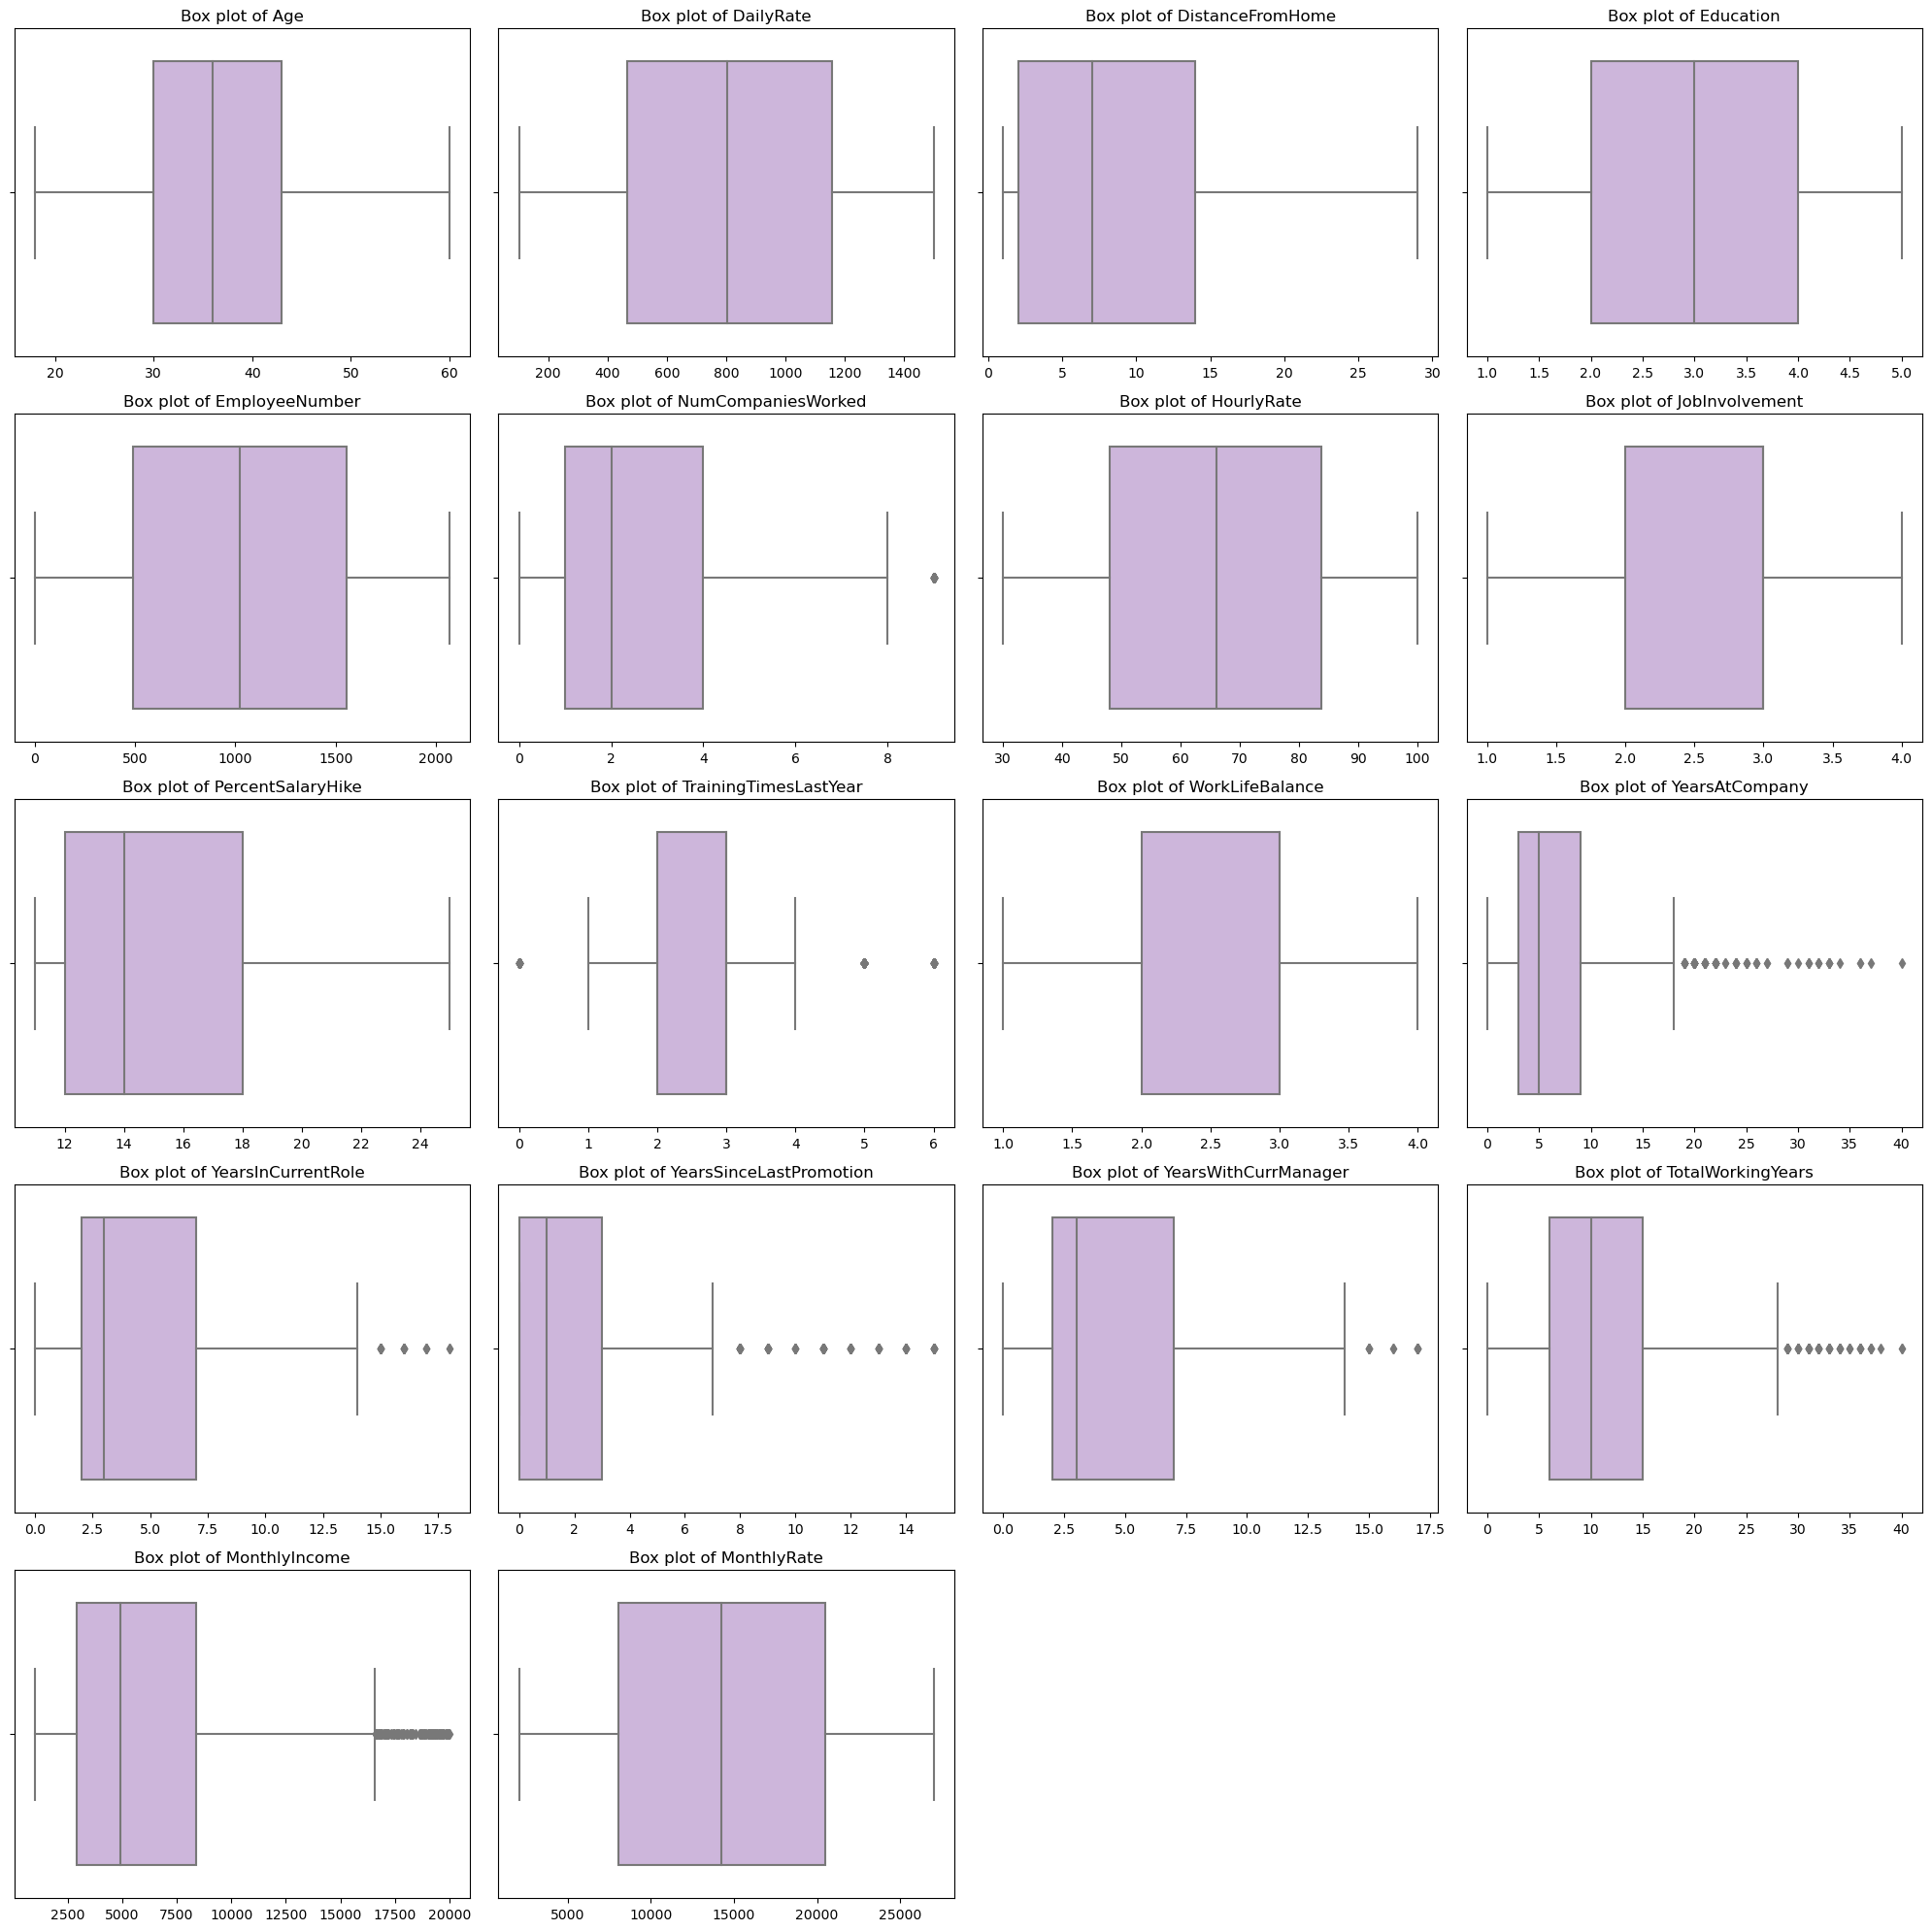

In [53]:
# Set the number of rows and columns for subplots
n_cols = 4
n_rows = (len(columns_to_plot) // n_cols) + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot box plots for each specified column
for i, column in enumerate(columns_to_plot):

    sns.boxplot(data[column], ax=axes[i], color='#cFB0E1')
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_xlabel('')

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### 5.Data Transformation and Extraction (การแปลงและการดึงข้อมูล)

#### 5.1 เปลี่ยน Feature ที่ Data เป็นประเภท Catagorical เป็น Numerical

In [28]:
from sklearn.preprocessing import LabelEncoder

# เลือก Column ที่มั่นใจว่าไม่ใช่ Numeric
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
label_encoders = {}

# แปลงข้อมูล Categorical เป็นตัวเลข
for col in categorical_columns:
    le = LabelEncoder()  # ใช้การ Encoder ในการแปลง
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# แสดงผลข้อมูลหลังการแปลง
print(f"Categorical columns: {categorical_columns}")
print("Transformed data preview:")
display(df[categorical_columns].head())

folder_path = 'CSV'
output_file = os.path.join(folder_path, 'to_Num.csv')
df.to_csv(output_file, index=False)


Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Transformed data preview:


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0


##### แปลง data ที่เป็น string ของตัวเลขให้เป็น numeric 

In [48]:
# แปลงคอลัมน์ที่ควรเป็นตัวเลขทั้งหมด
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # แปลงเป็นตัวเลข ถ้าไม่สามารถแปลงได้จะกลายเป็น NaN

folder_path = 'CSV'
output_file = os.path.join(folder_path, 'string_to_num.csv')
df.to_csv(output_file, index=False)


        Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2              

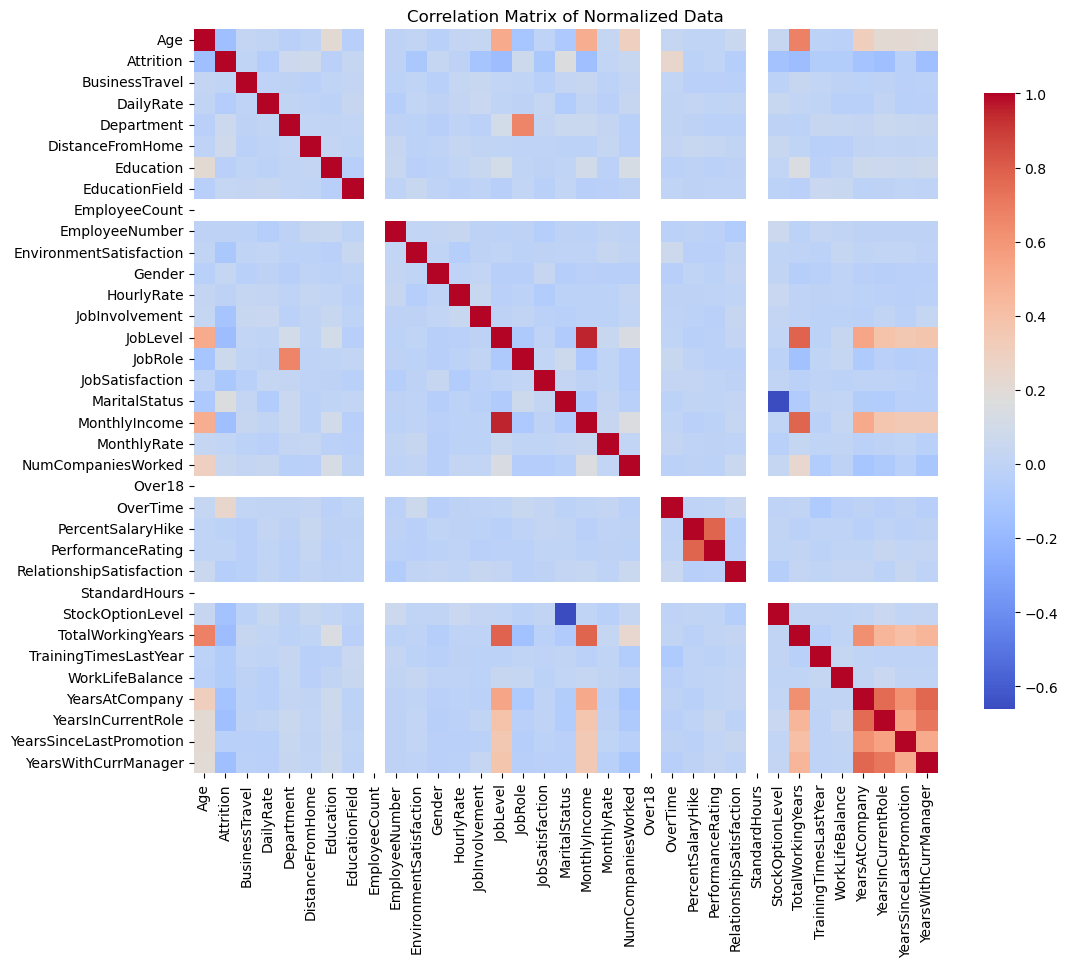

In [49]:
file_path = './CSV/string_to_num.csv'
data = pd.read_csv(file_path)

# Detect NaN values
nan_values = data.isna()  # or df.isnull()

# Show NaN locations
print(nan_values)

# Alternatively, count NaNs in each column
nan_count = df.isna().sum()
print("\nNaN count per column:\n", nan_count)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Normalized Data')
plt.show()

#### Drop column ที่มี Data อยู่ค่าเดียวทิ้ง

In [14]:
file_path = './CSV/string_to_num.csv'
data = pd.read_csv(file_path)

duplicate_columns = [col for col in data.columns if data[col].nunique() == 1]

# Drop these columns from the dataset
data_cleaned = data.drop(columns=duplicate_columns + ['EmployeeNumber'])

folder_path = 'CSV'
output_file = os.path.join(folder_path, 'del_not_unique.csv')
data_cleaned.to_csv(output_file, index=False)

        Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0                False      False           False                    False   
1                False      False           False              

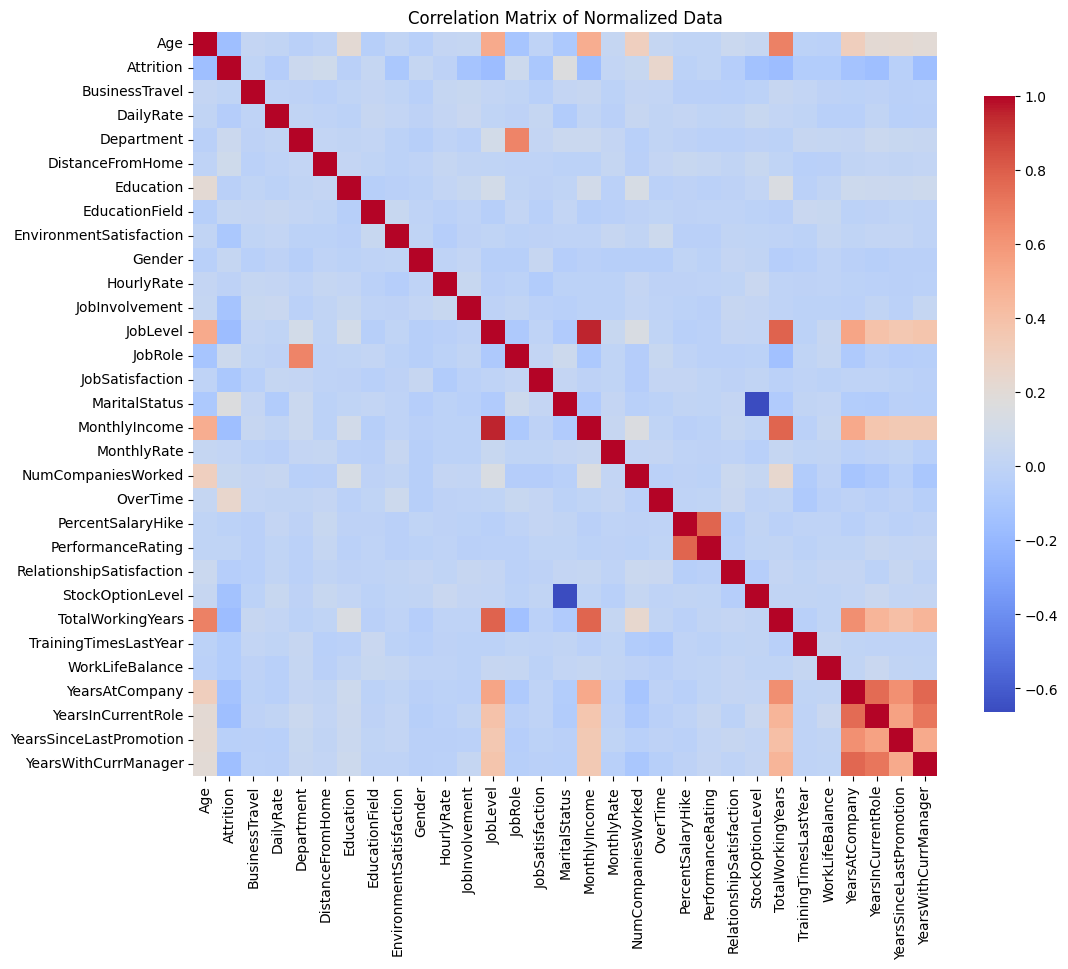

In [15]:
file_path = './CSV/del_not_unique.csv'
data = pd.read_csv(file_path)

# Detect NaN values
nan_values = data.isna()  # or df.isnull()

# Show NaN locations
print(nan_values)

# Alternatively, count NaNs in each column
nan_count = df.isna().sum()
print("\nNaN count per column:\n", nan_count)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Normalized Data')
plt.show()

##### 5.2 ตัดข้อมูลที่ไม่เหมาะสม และ กำจัด Outliner ออก


In [121]:
import numpy as np

# Load the data
file_path = './CSV/del_not_unique.csv'
data = pd.read_csv(file_path)

columns_to_plot = [
    "Age", "DailyRate","DistanceFromHome", "Education", "NumCompaniesWorked", "HourlyRate", "JobInvolvement",  
    "PercentSalaryHike", "TrainingTimesLastYear", "WorkLifeBalance", 
    "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", 
    "YearsWithCurrManager", "TotalWorkingYears", "MonthlyIncome", 
    "MonthlyRate"
]

# Function to identify outliers using the standard deviation method
def identify_outliers(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    threshold = 3  # You can adjust this threshold as necessary
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Function to handle outliers
def handle_outliers(df, column, option='delete'):
    outliers = identify_outliers(df, column)
    
    if option == 'delete':
        # Option 1: Delete outlier records
        if len(outliers) < 0.1 * len(df):  # Check if less than 10% of the data
            df = df[~df.index.isin(outliers.index)]
            print(f'Deleted {len(outliers)} outliers from {column}.')
        else:
            print(f'Not enough records to delete for {column}.')
            
    elif option == 'impute':
        # Option 2: Impute with mean or median (or any logical value)
        median_value = df[column].median()
        df[column] = np.where((df[column] < outliers[column].min()) | (df[column] > outliers[column].max()), median_value, df[column])
        print(f'Imputed outliers in {column} with median value: {median_value}.')
        
    elif option == 'replace':
        # Option 3: Replace with a specific logical value or based on histograms
        median_value = df[column].median()
        df[column] = np.where((df[column] < outliers[column].min()) | (df[column] > outliers[column].max()), median_value, df[column])
        print(f'Replaced outliers in {column} with median value: {median_value}.')

    return df

# Example usage for specified columns
for column in columns_to_plot:
    # Choose your option: 'delete', 'impute', or 'replace'
    option = 'delete'  # Change this to 'impute' or 'replace' as needed
    data = handle_outliers(data, column, option)

# Save the cleaned data
folder_path = 'CSV'
output_file = os.path.join(folder_path, 'no_outlier.csv')
data.to_csv(output_file, index=False)

Deleted 0 outliers from Age.
Deleted 0 outliers from DailyRate.
Deleted 0 outliers from DistanceFromHome.
Deleted 0 outliers from Education.
Deleted 0 outliers from NumCompaniesWorked.
Deleted 0 outliers from HourlyRate.
Deleted 0 outliers from JobInvolvement.
Deleted 0 outliers from PercentSalaryHike.
Deleted 0 outliers from TrainingTimesLastYear.
Deleted 0 outliers from WorkLifeBalance.
Deleted 25 outliers from YearsAtCompany.
Deleted 18 outliers from YearsInCurrentRole.
Deleted 45 outliers from YearsSinceLastPromotion.
Deleted 7 outliers from YearsWithCurrManager.
Deleted 18 outliers from TotalWorkingYears.
Deleted 36 outliers from MonthlyIncome.
Deleted 0 outliers from MonthlyRate.


##### 5.3. Missing values treatment


In [122]:
file_path = './CSV/no_outlier.csv'
# file_path = 'filled_data.csv'
data = pd.read_csv(file_path)

# Detect NaN values
nan_values = data.isna()  # or df.isnull()

# Show NaN locations
print(nan_values)

# Alternatively, count NaNs in each column
nan_count = df.isna().sum()
print("\nNaN count per column:\n", nan_count)

        Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1316  False      False           False      False       False   
1317  False      False           False      False       False   
1318  False      False           False      False       False   
1319  False      False           False      False       False   
1320  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0                False      False           False                    False   
1                False      False           False              

## ไม่มี Missing Value

##### 5.4. ทำ Normalization เพื่อทำให้ Feature อยู่ในช่วงเดียวกันทั้งหมด ทำให้ง่ายต่อการทำ Model ขึ้น

จัดการกราฟให้มีการกระจายตัวที่ดีขึ้น ประกอบด้วย 3 วิธี คือ 
1. Log Transformation
- วิธีการ: การใช้ค่า logarithm ของข้อมูล โดยทั่วไปจะใช้ log base 10 หรือ natural log (ln)
- การใช้งาน: เหมาะสำหรับข้อมูลที่มีการกระจายตัวแบบชิดขวา (right-skewed) หรือมีค่ามากที่ส่งผลต่อการกระจาย ตัวอย่างเช่น 
ผลลัพธ์: ช่วยลดความไม่สมมาตรและทำให้การกระจายตัวใกล้เคียงกับ Gaussian distribution มากขึ้น

2. Square Root Transformation
- วิธีการ: ใช้การถอดรากที่สองของค่าข้อมูล
- การใช้งาน: เหมาะสำหรับข้อมูลที่มีการกระจายตัวแบบชิดขวาเช่นเดียวกับ log transformation แต่มีความเหมาะสมกว่าเมื่อค่าที่ต่ำกว่าศูนย์มีน้อยมาก
ผลลัพธ์: ช่วยลด skewness และทำให้การกระจายตัวมีความสมมาตรดีขึ้น

3. Box-Cox Transformation
- วิธีการ: ใช้ฟังก์ชันที่มีพารามิเตอร์ λ (lambda) ที่ปรับเปลี่ยนเพื่อหาค่าที่เหมาะสมที่สุดในการทำให้ข้อมูลมีความสมมาตรที่สุด
- การใช้งาน: สามารถใช้กับข้อมูลเชิงปริมาณและสามารถหาค่าที่เหมาะสมที่สุดสำหรับ λ โดยใช้การเพิ่มความเหมาะสม (maximum likelihood estimation)
ผลลัพธ์: Box-Cox transformation มักจะให้ผลลัพธ์ที่ดีที่สุดในแง่ของการลด skewness

โดยเลือกใช้วิธีที่ได้ค่า skewness ใกล้เคียงกับ 0 มากที่สุด 


--- Column: Age ---
Best transformation for Age: Box-Cox (Skewness: -0.00)

--- Column: DailyRate ---
Best transformation for DailyRate: Box-Cox (Skewness: -0.20)

--- Column: DistanceFromHome ---
Best transformation for DistanceFromHome: Log (Skewness: -0.06)

--- Column: Education ---
Best transformation for Education: Box-Cox (Skewness: -0.15)

--- Column: NumCompaniesWorked ---
Best transformation for NumCompaniesWorked: Square Root (Skewness: 0.06)

--- Column: HourlyRate ---
Best transformation for HourlyRate: Box-Cox (Skewness: -0.11)

--- Column: JobInvolvement ---
Best transformation for JobInvolvement: Box-Cox (Skewness: -0.04)

--- Column: PercentSalaryHike ---
Best transformation for PercentSalaryHike: Box-Cox (Skewness: 0.10)

--- Column: TrainingTimesLastYear ---
Best transformation for TrainingTimesLastYear: Box-Cox (Skewness: 0.00)

--- Column: WorkLifeBalance ---
Best transformation for WorkLifeBalance: Box-Cox (Skewness: -0.04)

--- Column: YearsAtCompany ---
Best tr

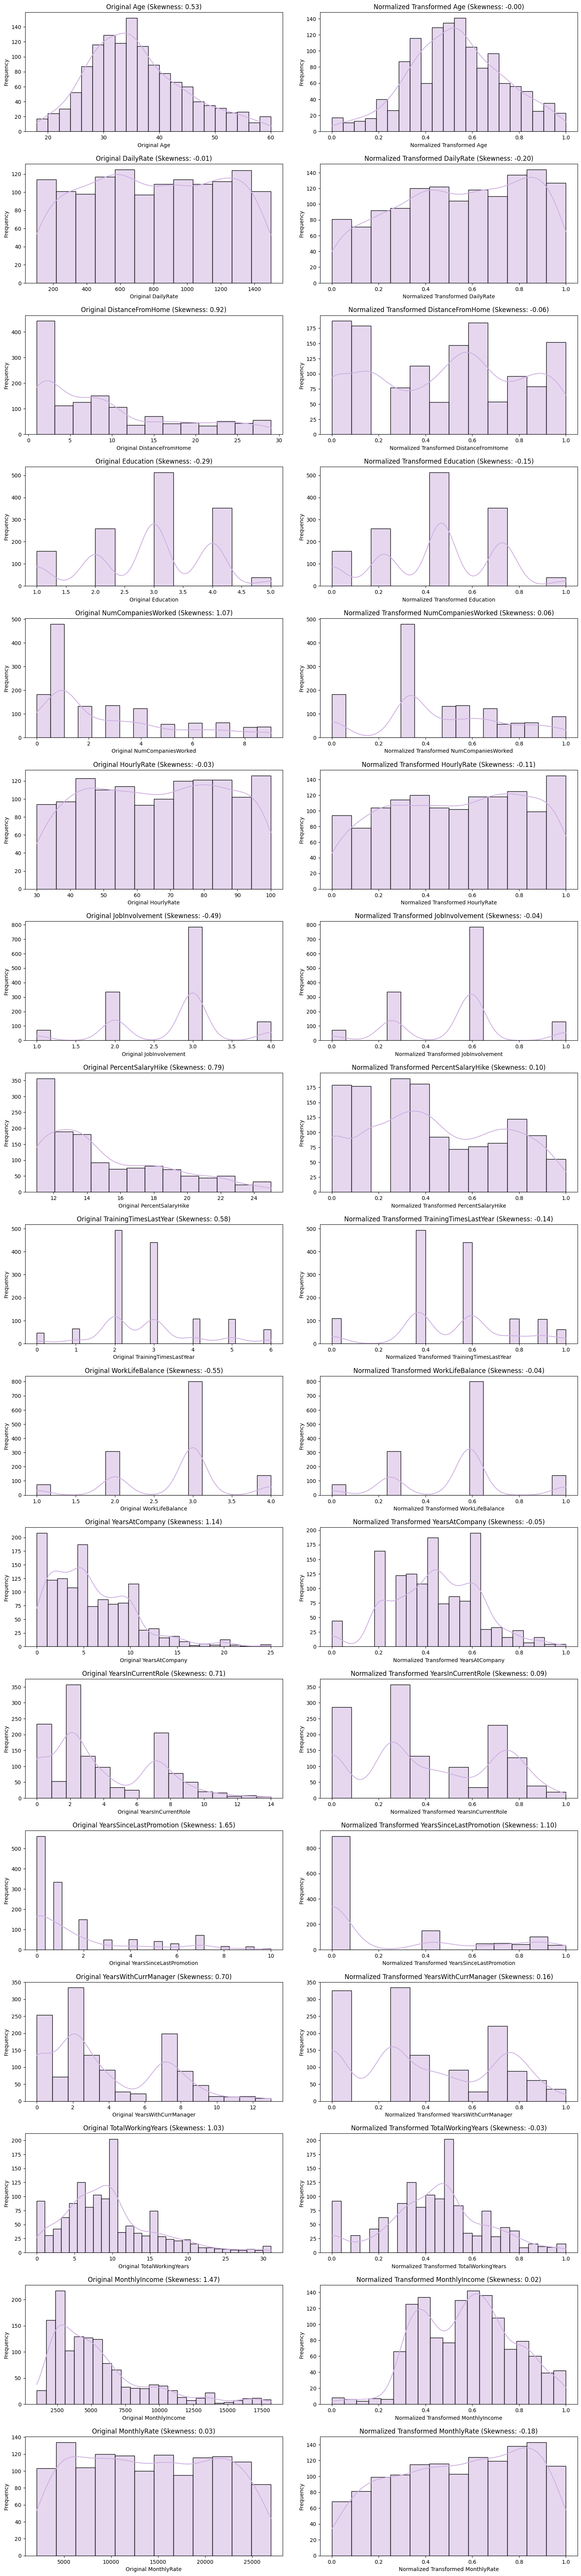

Normalized data saved to CSV\normalized_data.csv


In [123]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# โหลดข้อมูล
file_path = './CSV/no_outlier.csv'
data = pd.read_csv(file_path)

columns_to_transform = columns_to_plot 

# ฟังก์ชันในการประเมิน skewness และ plot
def plot_and_evaluate(column_data, title, ax):

    skewness = column_data.skew()
    sns.histplot(column_data.dropna(), kde=True, ax=ax, color='#cFB0E1')
    ax.set_title(f'{title} (Skewness: {skewness:.2f})')
    ax.set_xlabel(title)
    ax.set_ylabel('Frequency')
    return skewness

# ฟังก์ชันในการ Normalize ข้อมูล (min-max scaling)
def normalize(column_data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized = scaler.fit_transform(column_data.values.reshape(-1, 1))
    return pd.Series(normalized.flatten(), index=column_data.index)

# เตรียม Dictionary เพื่อเก็บข้อมูลที่ Normalize แล้ว
normalized_data_dict = {}

# ตั้งค่า grid ของ subplots
rows = len(columns_to_transform)
fig, axes = plt.subplots(rows, 2, figsize=(16, 4 * rows))
fig.tight_layout(pad=4.0)

# วนลูปผ่านแต่ละคอลัมน์และทำการแปลง
for i, column in enumerate(columns_to_transform):
    if column in data.columns and column != 'id':
        print(f"\n--- Column: {column} ---")
        
        column_data = data[column].copy()
        
        # ตรวจสอบว่ามีค่าติดลบหรือไม่
        if (column_data < 0).any():
            print(f"Column '{column}' contains negative values. Skipping skewness and transformations.")
            
            # เพียง Normalize อย่างเดียว
            normalized_data = normalize(column_data)
            normalized_data_dict[column] = normalized_data
            
            # Plot ข้อมูลต้นฉบับและ Normalize โดยไม่มีการแปลง
            ax_original = axes[i, 0]
            plot_and_evaluate(column_data, f'Original {column}', ax_original)
            
            ax_norm = axes[i, 1]
            plot_and_evaluate(normalized_data, f'Normalized {column}', ax_norm)
        
        else:
            # Plot ข้อมูลต้นฉบับ
            ax_original = axes[i, 0]
            plot_and_evaluate(column_data, f'Original {column}', ax_original)
            
            # ทำการแปลงต่างๆ
            log_transformed_data = pd.Series(np.log1p(column_data), index=column_data.index)
            sqrt_transformed_data = pd.Series(np.sqrt(column_data), index=column_data.index)
            
            # Box-Cox ต้องการค่ามากกว่า 0
            try:
                boxcox_transformed_data, _ = stats.boxcox(column_data[column_data > 0])
                boxcox_transformed_data = pd.Series(boxcox_transformed_data, index=column_data[column_data > 0].index)
                boxcox_skewness = boxcox_transformed_data.skew()
            except ValueError:
                boxcox_transformed_data = pd.Series(np.nan, index=column_data.index)
                boxcox_skewness = np.nan
            
            # คำนวณ skewness ของการแปลงแต่ละแบบ
            skew_log = log_transformed_data.skew() if not log_transformed_data.empty else np.nan
            skew_sqrt = sqrt_transformed_data.skew() if not sqrt_transformed_data.empty else np.nan
            skew_boxcox = boxcox_skewness
            
            skewness_values = {
                'Log': skew_log,
                'Square Root': skew_sqrt,
                'Box-Cox': skew_boxcox
            }
            
            # เลือกการแปลงที่ skewness ใกล้เคียงกับ 0 มากที่สุด
            best_transformation = min(
                [k for k in skewness_values if not np.isnan(skewness_values[k])],
                key=lambda k: abs(skewness_values[k])
            )
            
            print(f"Best transformation for {column}: {best_transformation} (Skewness: {skewness_values[best_transformation]:.2f})")
            
            # เลือกข้อมูลที่ถูกแปลงดีที่สุด
            if best_transformation == 'Log':
                best_transformed_data = log_transformed_data
            elif best_transformation == 'Square Root':
                best_transformed_data = sqrt_transformed_data
            elif best_transformation == 'Box-Cox':
                best_transformed_data = boxcox_transformed_data
            
            # สร้าง Series สำหรับการแปลงทั้งหมด โดยแทนที่เฉพาะค่าที่มากกว่า 0
            transformed_full = pd.Series(np.nan, index=column_data.index)
            transformed_full.loc[column_data >= 0] = best_transformed_data
            
            # นำข้อมูลที่ถูกแปลงดีที่สุดแล้วมา normalize ให้อยู่ในช่วง 0-1
            normalized_data = normalize(transformed_full.fillna(0))
            normalized_data_dict[column] = normalized_data
            
            # Plot ข้อมูลที่ Normalize แล้ว
            ax_norm = axes[i, 1]
            plot_and_evaluate(normalized_data, f'Normalized Transformed {column}', ax_norm)



plt.show()

# สร้าง DataFrame จาก normalized_data_dict
normalized_df = pd.DataFrame(normalized_data_dict)

final_data = data.copy()
for column in normalized_data_dict:
    final_data[column] = normalized_df[column]

folder_path = 'CSV'
output_file = os.path.join(folder_path, 'normalized_data.csv')
final_data.to_csv(output_file, index=False)

print(f"Normalized data saved to {output_file}")

Plot data after remove outlier

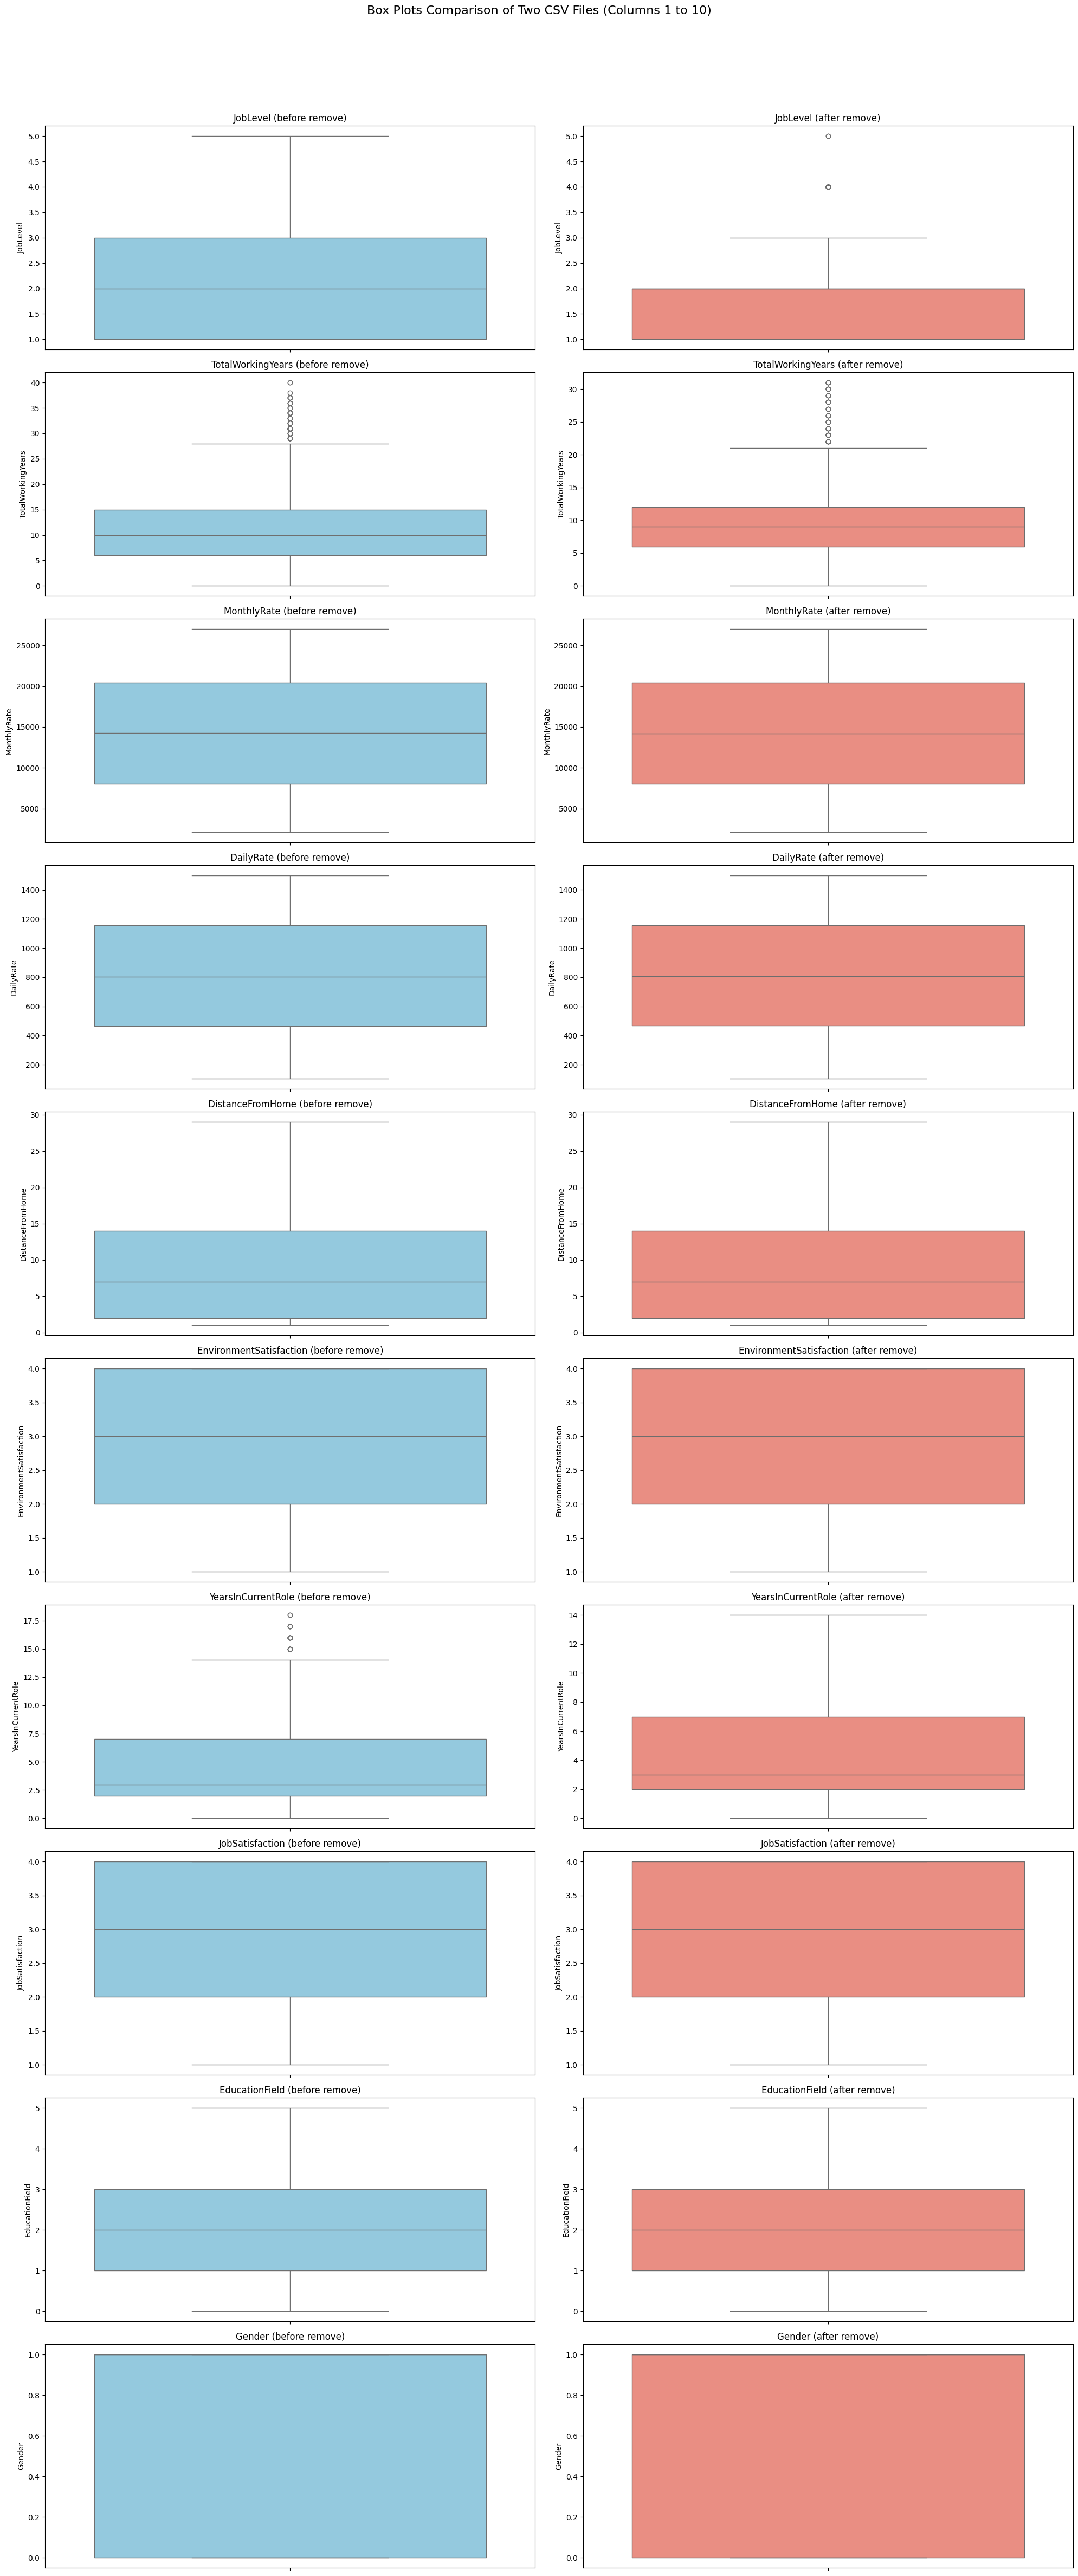

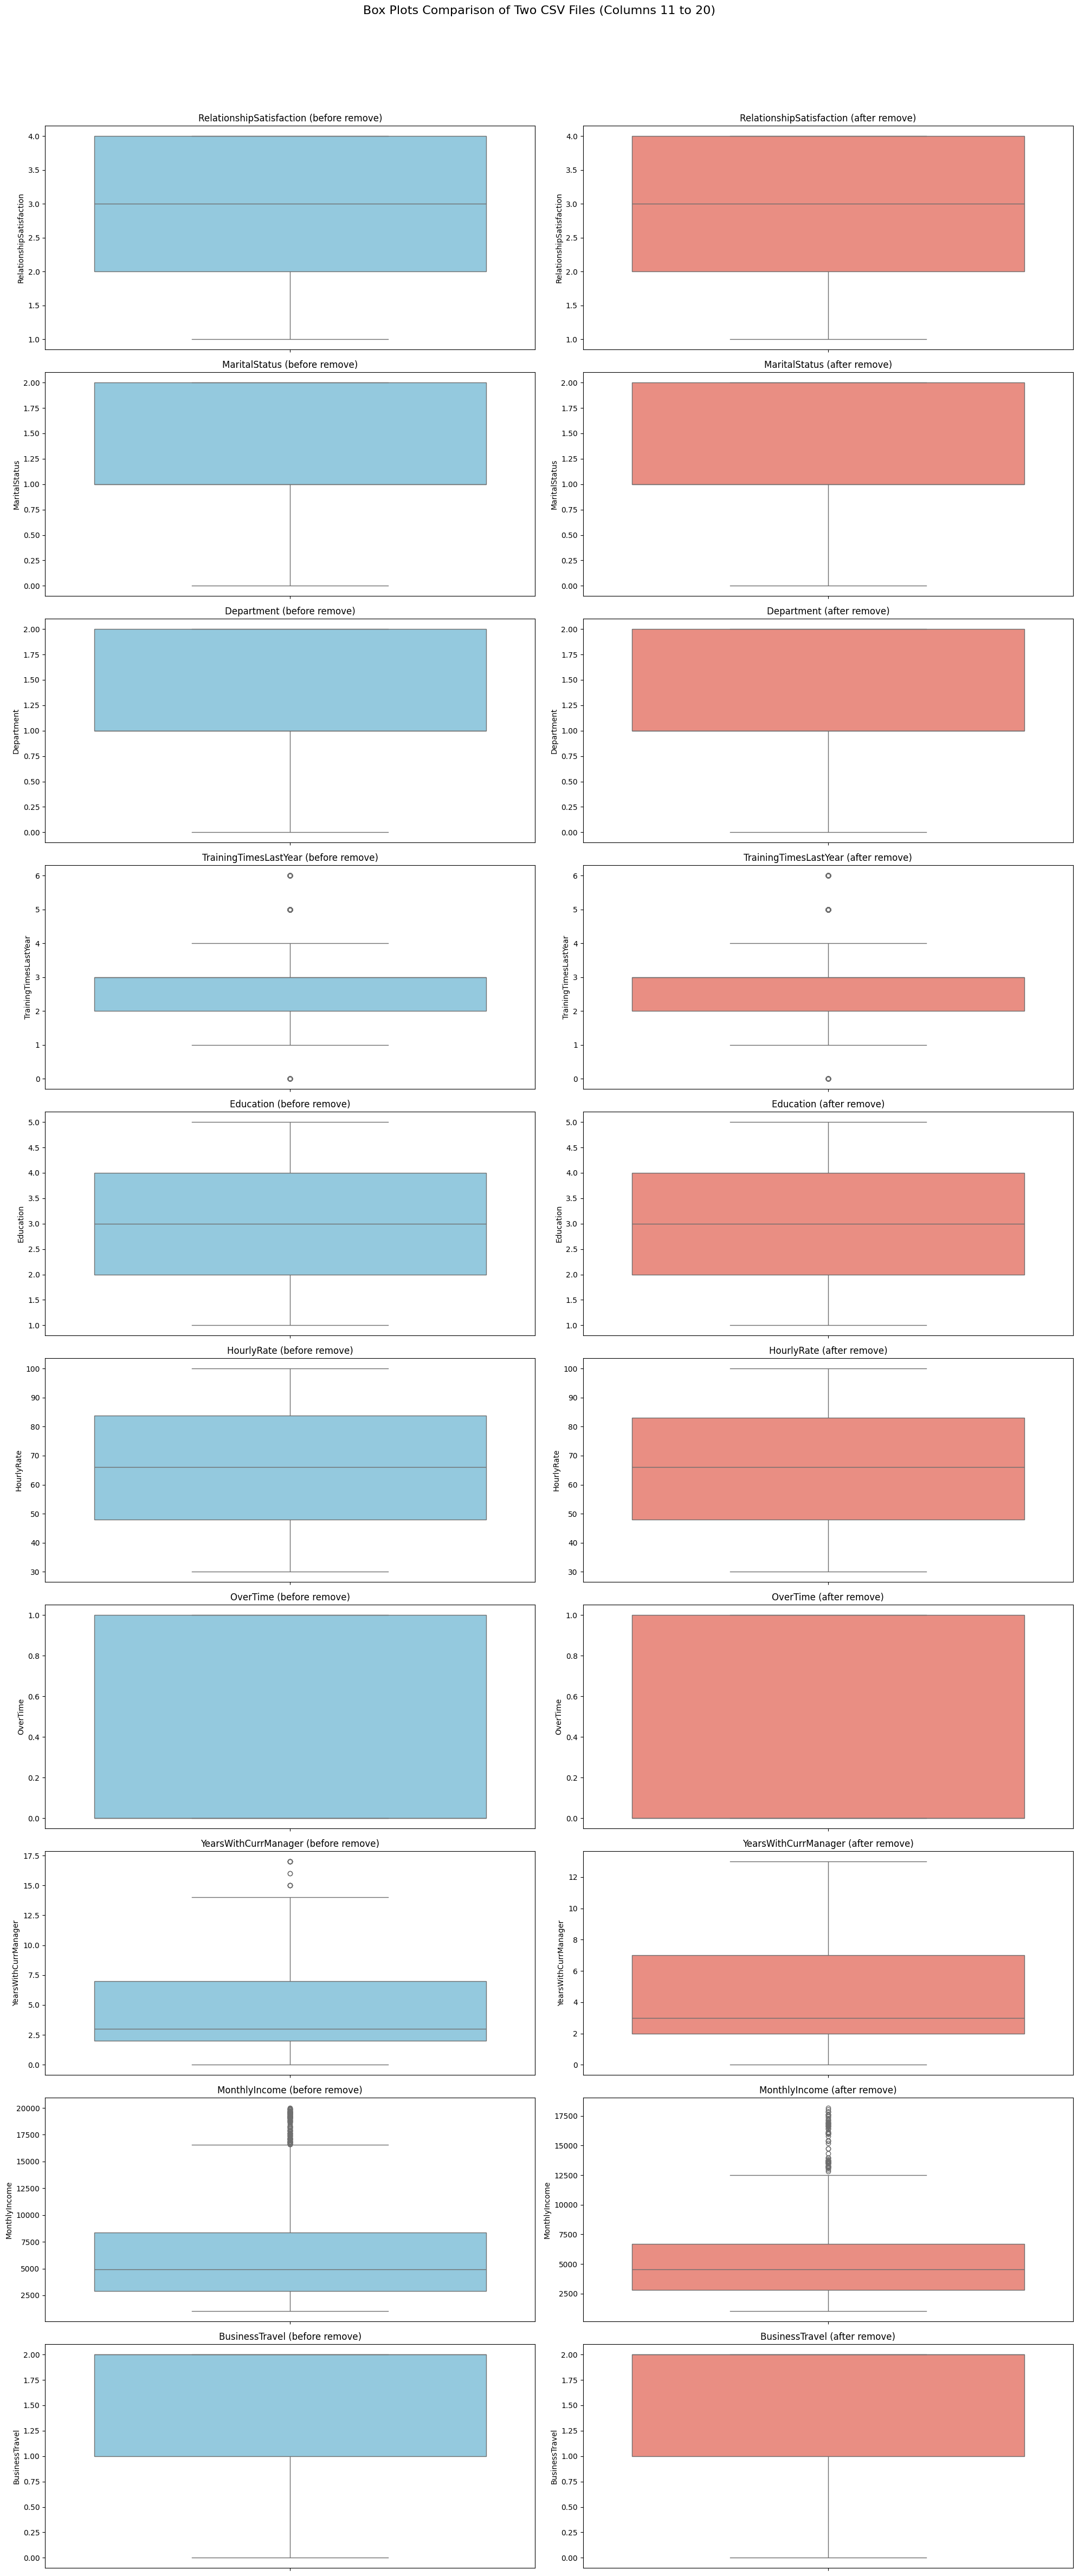

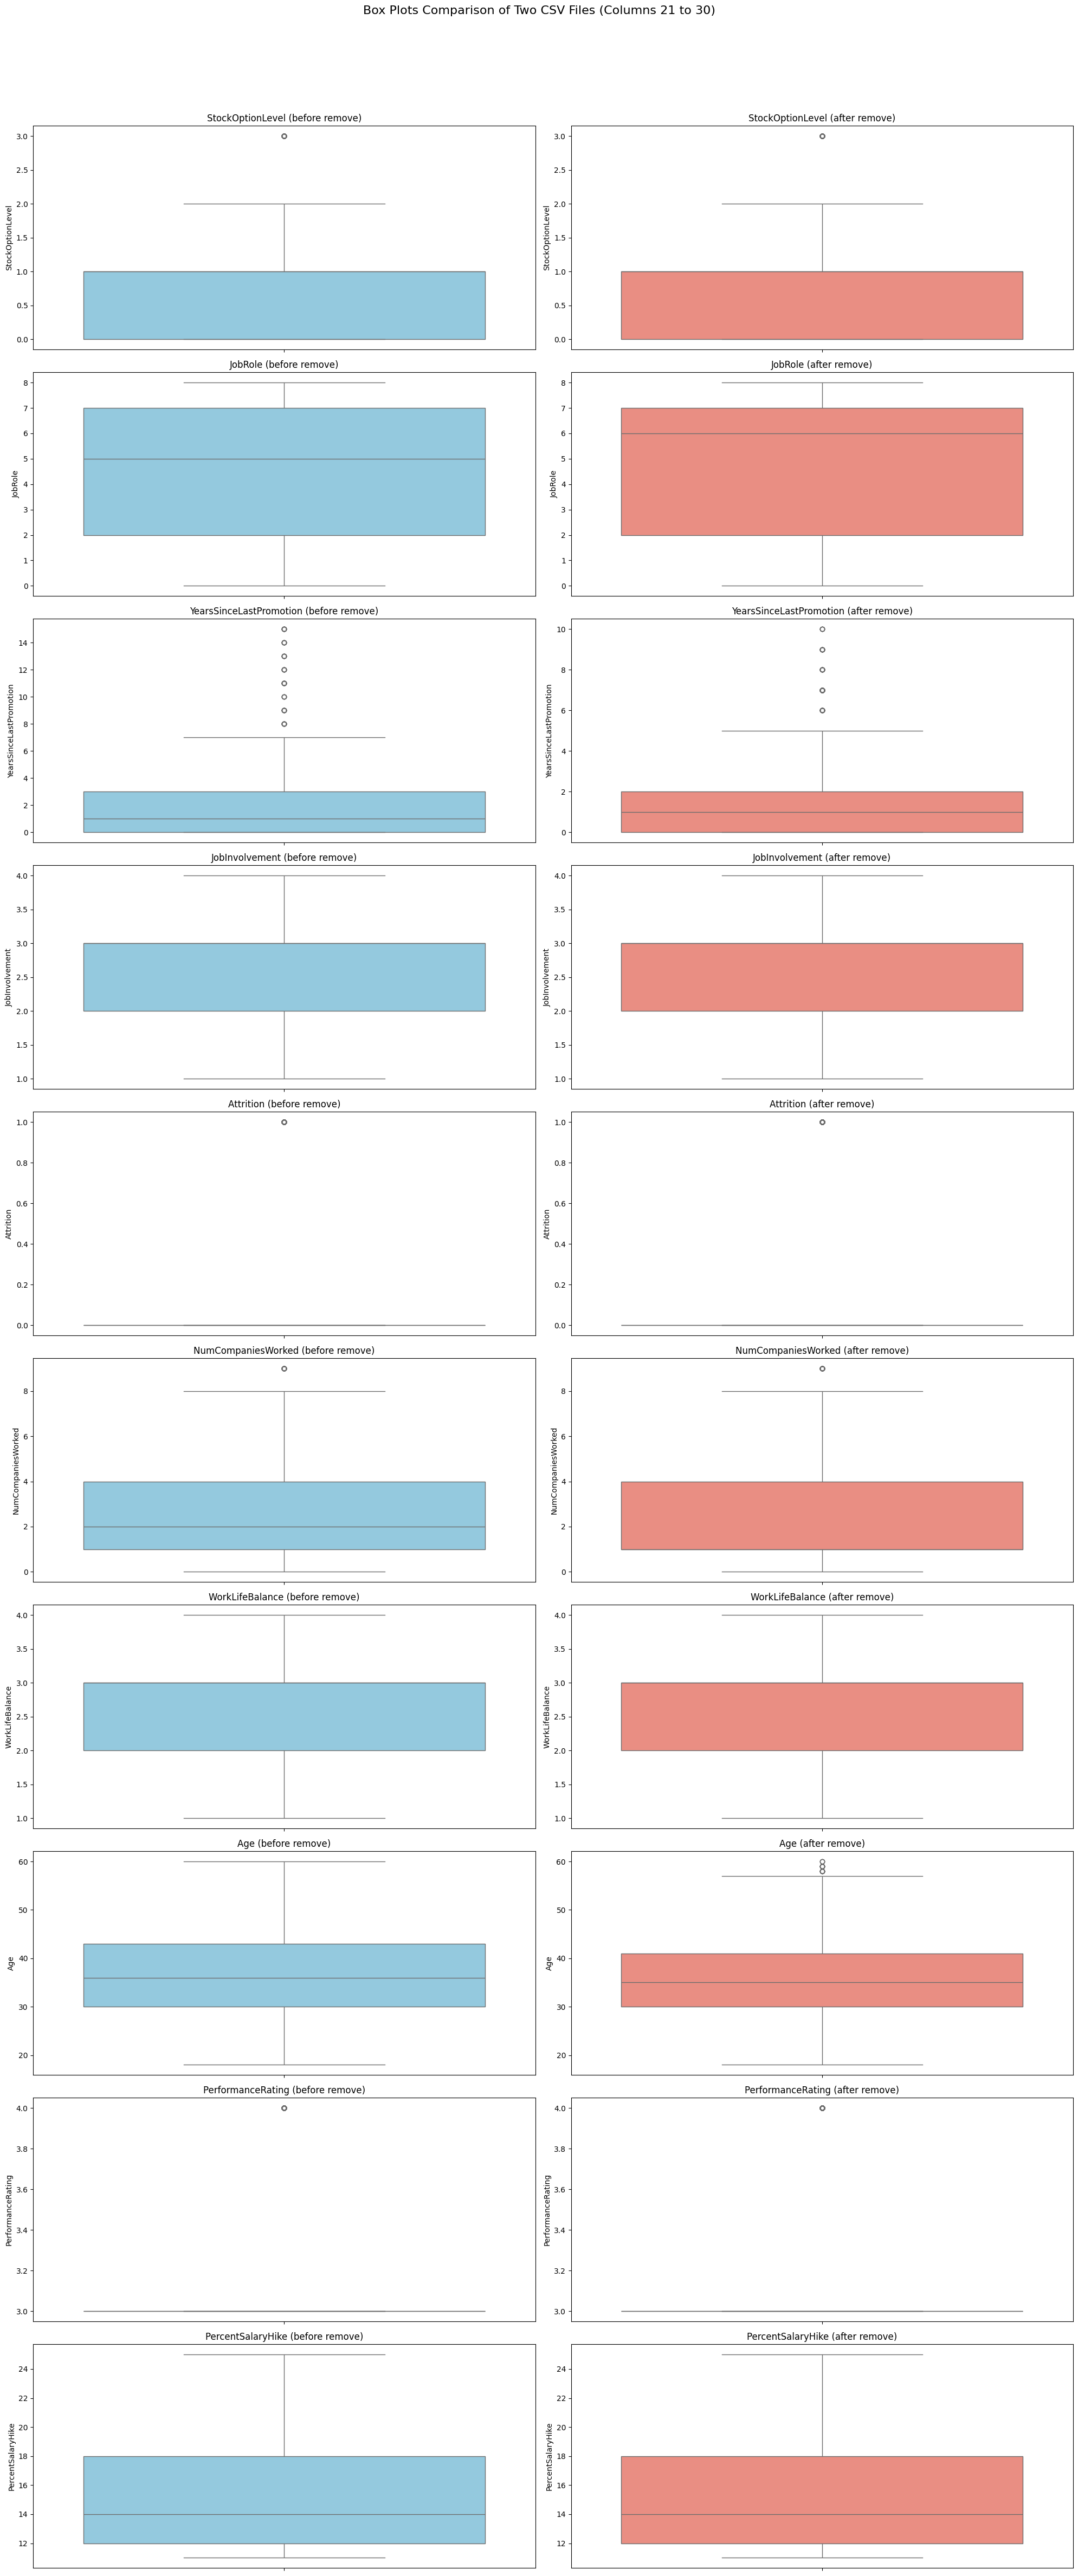

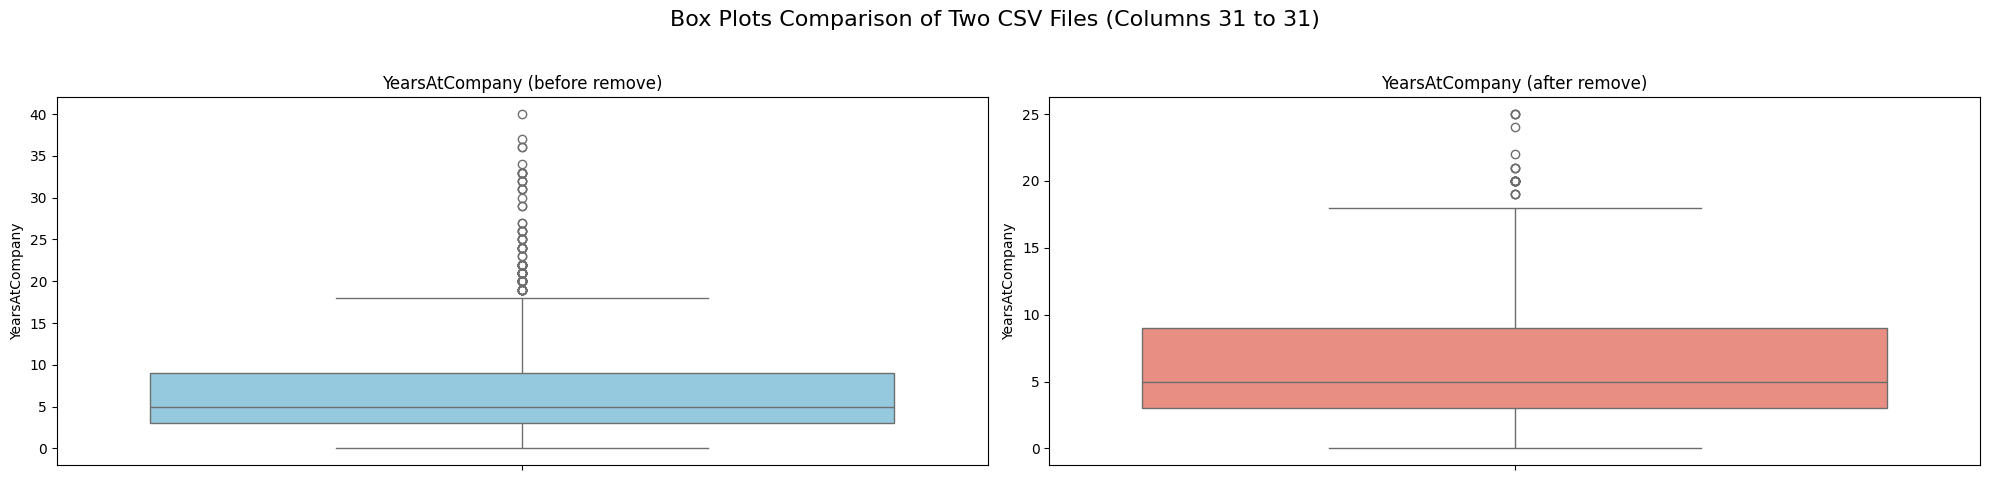

In [124]:
# Define directory for saving plots
plots_dir = './plots'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Load the two CSV files into separate DataFrames
file_path1 = './CSV/string_to_num.csv' 
file_path2 = './CSV/no_outlier.csv'  
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Function to plot side-by-side box plots for comparison
def plot_boxplots_side_by_side(df1, df2, columns, title, filename_prefix):
    max_subplots = 20  # Strict limit for subplots (10 columns per figure)
    
    # Loop through columns in batches of 10 (20 subplots for side-by-side plots)
    for start in range(0, len(columns), max_subplots // 2):
        # Slice the columns for the current figure
        columns_slice = columns[start:start + max_subplots // 2]
        num_rows = len(columns_slice)  # One row per column
        
        plt.figure(figsize=(20, 5 * num_rows))
        
        for i, column in enumerate(columns_slice):
            # Box plot for the first CSV file
            plt.subplot(num_rows, 2, 2 * i + 1)
            sns.boxplot(y=df1[column], color='skyblue')
            plt.title(f'{column} (before remove)')
            
            # Box plot for the second CSV file
            plt.subplot(num_rows, 2, 2 * i + 2)
            sns.boxplot(y=df2[column], color='salmon')
            plt.title(f'{column} (after remove)')
        
        # Title and layout
        plt.suptitle(f'{title} (Columns {start + 1} to {start + len(columns_slice)})', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        # Save the figure with a unique filename based on the column range
        filename = f"{filename_prefix}_{start + 1}_to_{start + len(columns_slice)}.png"
        plt.savefig(os.path.join(plots_dir, filename))
        plt.show()

# Select common numeric columns in both DataFrames
common_numeric_columns = list(set(df1.select_dtypes(include='number').columns) & set(df2.select_dtypes(include='number').columns))

# Plot side-by-side box plots for comparison
plot_boxplots_side_by_side(df1, df2, common_numeric_columns, "Box Plots Comparison of Two CSV Files", 'boxplots_comparison')

### Feature select by ANOVA

In [ ]:
import pandas as pd
from sklearn.feature_selection import f_classif

def Anova(file_path, target_column, drop_columns):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Separate features and target variable
    X = df.drop(drop_columns, axis=1)
    y = df[target_column]
    
    # Calculate F-values for each feature
    F_values, _ = f_classif(X, y)
    
    # Rank features by F-values
    feature_names = X.columns  # Get feature names
    feature_ranks = sorted(zip(feature_names, F_values), key=lambda x: x[1], reverse=True)
    
    # Display ranked features
    print("Features ranked by ANOVA F-value:")
    for rank, (feature, score) in enumerate(feature_ranks, 1):
        print(f"{rank}. {feature}: F-value = {score}")
    
    return feature_ranks

# Example usage
file_path = './CSV/normalized_data.csv'
target_column = 'Attrition'
drop_columns = ['Attrition', 'Gender', 'JobSatisfaction', 'JobLevel', 'OverTime', 
                'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
                'WorkLifeBalance', 'Education', 'EnvironmentSatisfaction', 
                'JobInvolvement','BusinessTravel', 'Department', 
                'EducationField', 'JobRole', 'MaritalStatus']
ranked_features = Anova(file_path, target_column, drop_columns)


Features ranked by ANOVA F-value:
1. TotalWorkingYears: F-value = 63.872245568356156
2. YearsAtCompany: F-value = 58.467647610097366
3. MonthlyIncome: F-value = 55.10219785668229
4. YearsInCurrentRole: F-value = 45.74564752313566
5. Age: F-value = 39.736946113043075
6. YearsWithCurrManager: F-value = 39.57865017593996
7. DistanceFromHome: F-value = 9.407055218475515
8. DailyRate: F-value = 4.307410045778346
9. NumCompaniesWorked: F-value = 4.228079046516311
10. TrainingTimesLastYear: F-value = 3.3637829602079683
11. MonthlyRate: F-value = 0.46823197719177745
12. YearsSinceLastPromotion: F-value = 0.4546506777420771
13. PercentSalaryHike: F-value = 0.33222040470783526
14. HourlyRate: F-value = 0.04707520727736089


## 6.Model Training


### Define Target

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

file_path = './CSV/normalized_data.csv'
df = pd.read_csv(file_path)

X = df.drop(['Attrition'], axis=1)  # Features
y = df['Attrition']               # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### Model Training

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, recall_score, precision_score

rf = RandomForestClassifier(random_state=50,class_weight={0:10,1:1})
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

lr = LogisticRegression(random_state=50, class_weight={0:1,1:1})
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)




models = {
    "Random Forest": rf_pred,
    "Logistic Regression": lr_pred,
}


print("{:<30} {:<10} {:<10} {:<10}".format("Model", "Accuracy", "Recall", "Precision"))
print("="*70)
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    print("{:<30} {:<10.2f} {:<10.2f} {:<10.2f}".format(model_name, accuracy, recall, precision))




Model                          Accuracy   Recall     Precision 
Random Forest                  0.85       0.85       0.83      
Logistic Regression            0.86       0.86       0.85      


In [181]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Neural Network
nn = MLPClassifier(random_state=42, max_iter=1000, learning_rate_init=0.001)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# K-Nearest Neighbors (K-NN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluate models
models = {
    "Random Forest": rf_pred,
    "SVM": svm_pred,
    "Neural Network": nn_pred,
    "Logistic Regression": lr_pred,
    "Decision Tree": dt_pred,
    "K-Nearest Neighbors (K-NN)": knn_pred
}

from sklearn.metrics import accuracy_score, recall_score, precision_score

# Evaluate models and print results
print("{:<30} {:<10} {:<10} {:<10}".format("Model", "Accuracy", "Recall", "Precision"))
print("="*70)

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    print("{:<30} {:<10.2f} {:<10.2f} {:<10.2f}".format(model_name, accuracy, recall, precision))



Model                          Accuracy   Recall     Precision 
Random Forest                  0.85       0.85       0.85      
SVM                            0.85       0.85       0.83      
Neural Network                 0.84       0.84       0.83      
Logistic Regression            0.86       0.86       0.85      
Decision Tree                  0.78       0.78       0.79      
K-Nearest Neighbors (K-NN)     0.84       0.84       0.82      


## Plot ROC Graph

### Random Forest

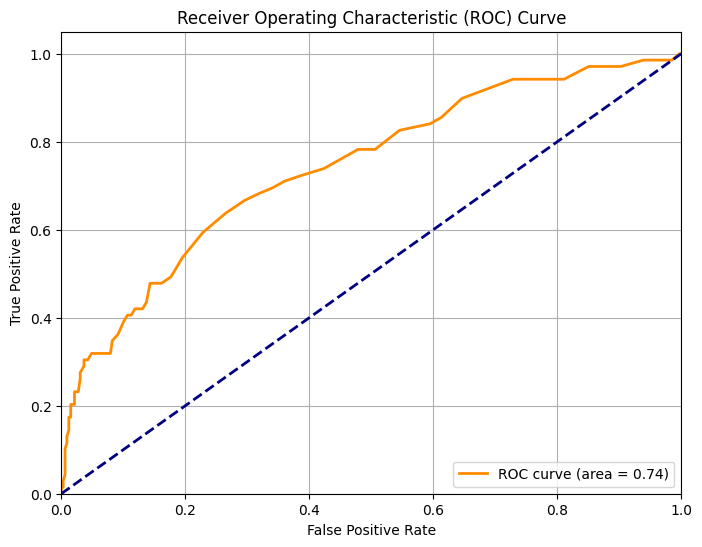

In [137]:
from sklearn.metrics import roc_curve, auc

rf_pred_proba = rf.predict_proba(X_test)[:, 1]
# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_proba)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Logistic Regression

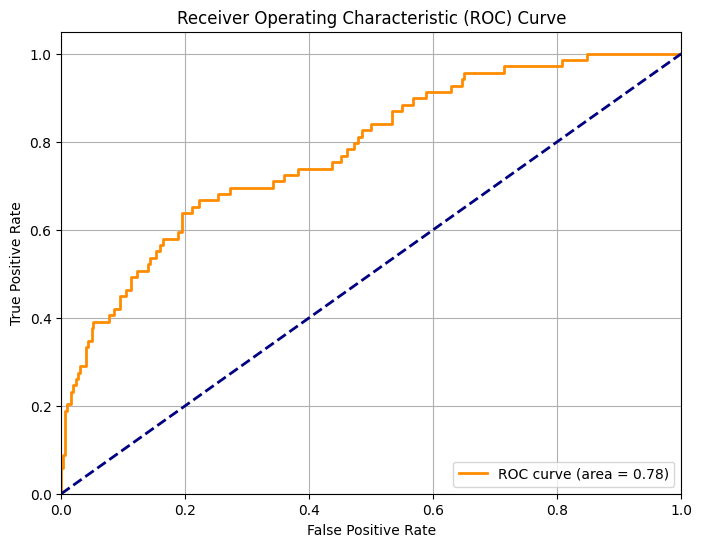

In [138]:
from sklearn.metrics import roc_curve, auc

lr_pred_proba = lr.predict_proba(X_test)[:, 1]
# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_proba)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Confusion Matrix

### Random Forest

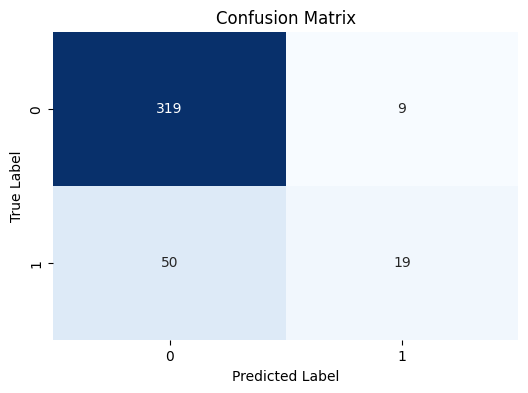

In [99]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

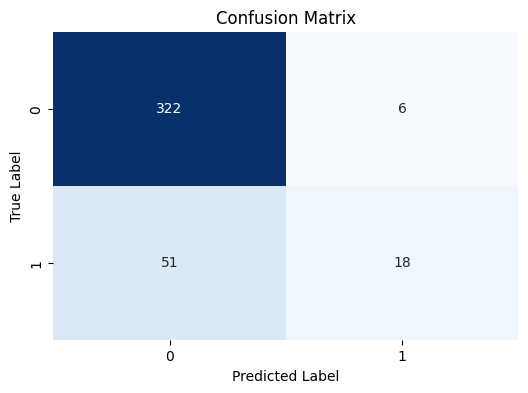

In [150]:
cm = confusion_matrix(y_test, lr_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Experiment 1 ลองตัด Overtime ออกแล้ว Train

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

file_path = './CSV/normalized_data.csv'
df = pd.read_csv(file_path)

X = df.drop(['Attrition','OverTime'], axis=1)  # Features
y = df['Attrition']               # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

rf = RandomForestClassifier(random_state=50,class_weight={0:1,1:1})
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

lr = LogisticRegression(random_state=50, class_weight={0:1,1:3})
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

models = {
    "Random Forest": rf_pred,
    "Logistic Regression": lr_pred,
}


print("{:<30} {:<10} {:<10} {:<10}".format("Model", "Accuracy", "Recall", "Precision"))
print("="*70)
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    print("{:<30} {:<10.2f} {:<10.2f} {:<10.2f}".format(model_name, accuracy, recall, precision))


Model                          Accuracy   Recall     Precision 
Random Forest                  0.85       0.85       0.85      
Logistic Regression            0.81       0.81       0.83      


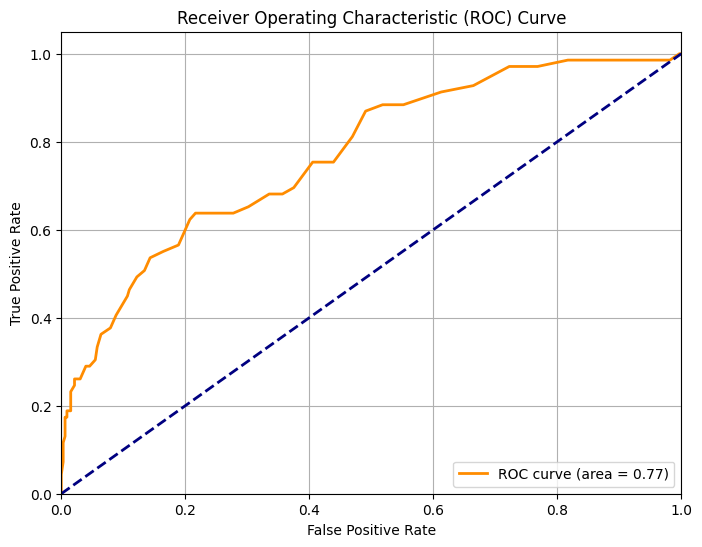

In [167]:
from sklearn.metrics import roc_curve, auc

rf_pred_proba = rf.predict_proba(X_test)[:, 1]
# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_proba)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

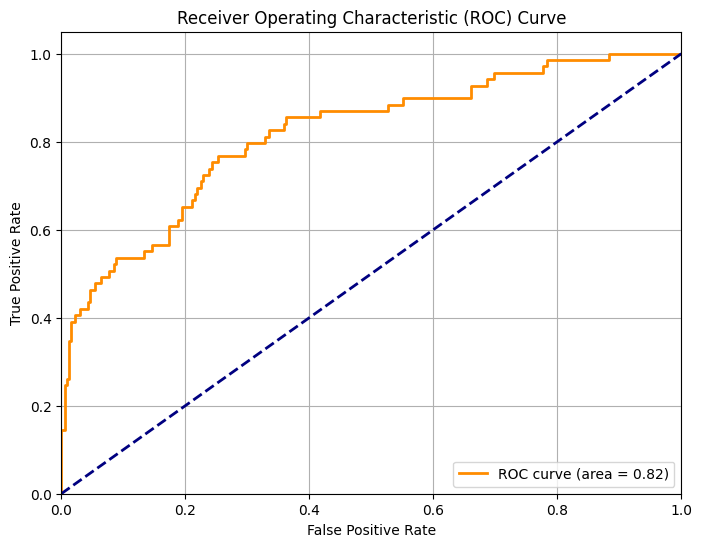

In [176]:
from sklearn.metrics import roc_curve, auc

lr_pred_proba = lr.predict_proba(X_test)[:, 1]
# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_proba)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Random Forest

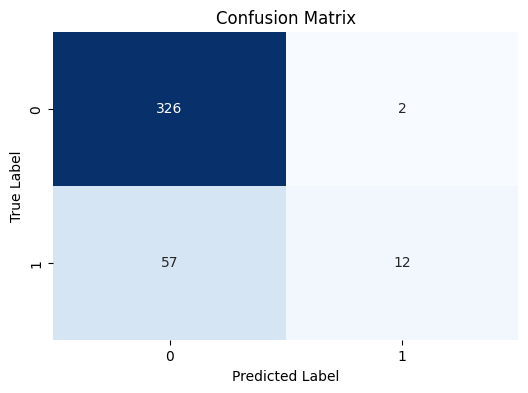

In [169]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

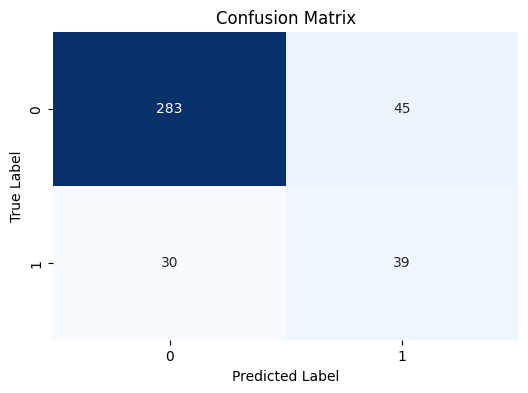

In [179]:
cm = confusion_matrix(y_test, lr_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### สรุปได้ว่า Overtime ไม่มีผลต่อการทำ Model  

# Experiment 2 ลองตัด JobLevel ออกแล้ว Train

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

file_path = './CSV/normalized_data.csv'
df = pd.read_csv(file_path)

X = df.drop(['Attrition','JobLevel'], axis=1)  # Features
y = df['Attrition']               # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)